### **基礎設定**

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

MAP_SIZE = 256
random.seed(11505050)

# Define Ship class
class Ship:
    def __init__(self, ship_id, ship_type, position, owner):
        self.ship_id = ship_id  # Unique identifier
        self.ship_type = ship_type
        self.position = position  # (x, y)
        self.owner = owner  # 'A' or 'B'
        self.set_attributes()
        self.alive = True
        self.hit_points_remaining = self.hit_points

    def set_attributes(self):
        if self.ship_type == 'large':
            self.move_range = 4
            self.sonic_missiles = 5
            self.hypersonic_missiles = 4
            self.hit_points = 3  # Needs to be hit 3 times to sink
        elif self.ship_type == 'medium':
            self.move_range = 3
            self.sonic_missiles = 4
            self.hypersonic_missiles = 2
            self.hit_points = 2  # Needs to be hit 2 times to sink
        elif self.ship_type == 'small':
            self.move_range = 2
            self.sonic_missiles = 0
            self.hypersonic_missiles = 3
            self.hit_points = 1  # Needs to be hit 1 time to sink
        else:
            raise ValueError("Unknown ship type")

        self.max_move_attempts = 100  # Maximum attempts to move

    def is_sunk(self):
        return self.hit_points_remaining <= 0

    def take_damage(self, damage):
        self.hit_points_remaining -= damage
        if self.is_sunk():
            self.alive = False

    def available_weapons(self):
        weapons = []
        if self.sonic_missiles > 0:
            weapons.append('sonic')
        if self.hypersonic_missiles > 0:
            weapons.append('hypersonic')
        return weapons

# Define Weapon class
class Weapon:
    def __init__(self, weapon_type):
        self.weapon_type = weapon_type
        self.set_attributes()

    def set_attributes(self):
        if self.weapon_type == 'sonic':
            # Sonic missile attack pattern (cross shape: up, down, left, right)
            self.attack_pattern = self.get_sonic_attack_pattern()
        elif self.weapon_type == 'hypersonic':
            # Hypersonic missile attack pattern (3x3 grid)
            self.attack_pattern = self.get_hypersonic_attack_pattern()
        else:
            raise ValueError("Unknown weapon type")

    @staticmethod
    def get_sonic_attack_pattern():
        return [(0, -1), (-1, 0), (0, 0), (1, 0), (0, 1)]

    @staticmethod
    def get_hypersonic_attack_pattern():
        return [(-1, -1), (0, -1), (1, -1),
                (-1,  0), (0,  0), (1,  0),
                (-1,  1), (0,  1), (1,  1)]

# Define GameMap class
class GameMap:
    def __init__(self, size):
        self.size = size
        # Initialize grid with None
        self.grid = [[None for _ in range(size)] for _ in range(size)]

    def place_ship(self, ship):
        x, y = ship.position
        if self.is_within_bounds(x, y):
            if self.grid[y][x] is None:
                self.grid[y][x] = ship
            else:
                raise ValueError(f"Position ({x}, {y}) is already occupied by another ship.")
        else:
            raise ValueError(f"Position ({x}, {y}) is out of bounds.")

    def move_ship(self, ship, new_position):
        old_x, old_y = ship.position
        new_x, new_y = new_position
        if self.is_within_bounds(new_x, new_y):
            if self.grid[new_y][new_x] is None:
                self.grid[old_y][old_x] = None
                self.grid[new_y][new_x] = ship
                ship.position = (new_x, new_y)
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) moved to position ({new_x}, {new_y})")
                return True
            else:
                # Target position is occupied; cannot move
                return False
        else:
            # Target position is out of bounds; cannot move
            return False

    def is_within_bounds(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size

    def remove_ship(self, ship):
        x, y = ship.position
        self.grid[y][x] = None

    def get_ships_by_owner(self, owner):
        ships = []
        for row in self.grid:
            for cell in row:
                if cell is not None and cell.owner == owner and cell.alive:
                    ships.append(cell)
        return ships

    def get_all_ships(self):
        ships = []
        for row in self.grid:
            for cell in row:
                if cell is not None and cell.alive:
                    ships.append(cell)
        return ships

### **所有事件隨機**


===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hypersonic missile to attack position (173, 158)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (81, 8)
Ship ID 7 (A small) is preparing to use hypersonic missile to attack position (191, 158)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (18, 68)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (162, 97)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (125, 183)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (110, 226)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (24, 45)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (186, 20)
Ship ID 16 (B small) moved to position (249, 26)
Ship ID 14 (B medium) moved to position (192, 32)
Ship ID 9 (B large) moved to position (179, 114)
Ship ID 15 (B small) move

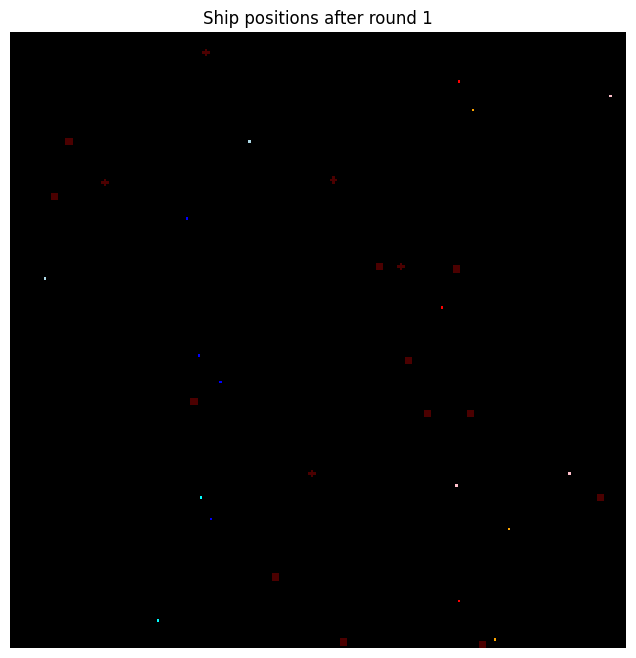


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hypersonic missile to attack position (199, 70)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (222, 182)
Ship ID 7 (A small) is preparing to use hypersonic missile to attack position (179, 176)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (112, 136)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (29, 175)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (250, 152)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (179, 205)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (55, 26)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (185, 23)
Ship ID 16 (B small) moved to position (248, 27)
Ship ID 14 (B medium) moved to position (194, 31)
Ship ID 9 (B large) moved to position (178, 115)
Ship ID 15 (B small) moved

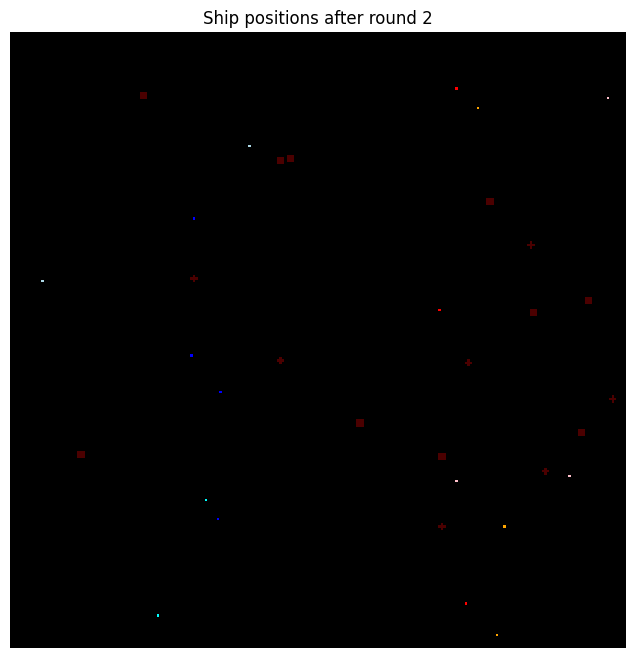


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hypersonic missile to attack position (20, 7)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (213, 68)
Ship ID 7 (A small) is preparing to use hypersonic missile to attack position (48, 122)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (226, 9)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (59, 66)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (71, 46)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (53, 147)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (148, 76)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (181, 23)
Ship ID 16 (B small) moved to position (247, 26)
Ship ID 14 (B medium) moved to position (192, 31)
Ship ID 9 (B large) moved to position (181, 114)
Ship ID 15 (B small) moved to 

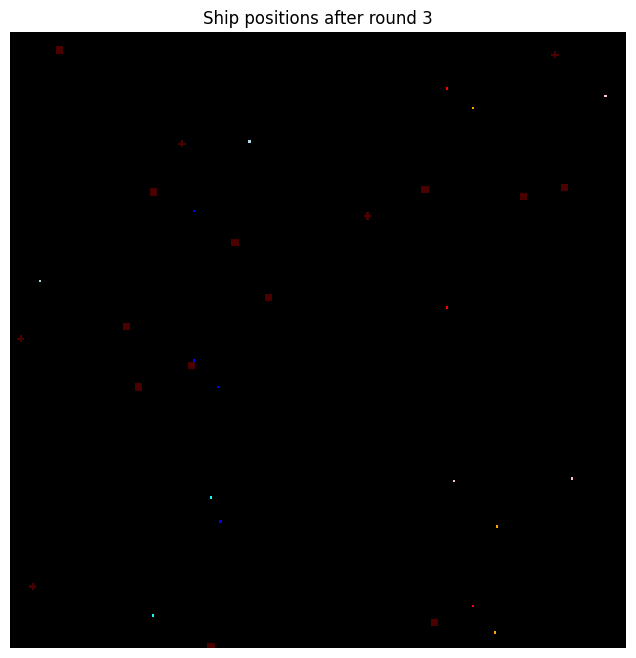


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (71, 143)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (11, 167)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (221, 251)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (153, 255)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (136, 127)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (17, 209)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (179, 25)
Ship ID 16 (B small) moved to position (246, 25)
Ship ID 14 (B medium) moved to position (194, 30)
Ship ID 9 (B large) moved to position (180, 112)
Ship ID 15 (B small) moved to position (235, 185)
Ship ID 17 (B small) moved to position (183, 185)
Ship ID 13 (B medium) moved to position (205, 205)
Ship ID 11 (B large) moved to position (191, 239)
Sh

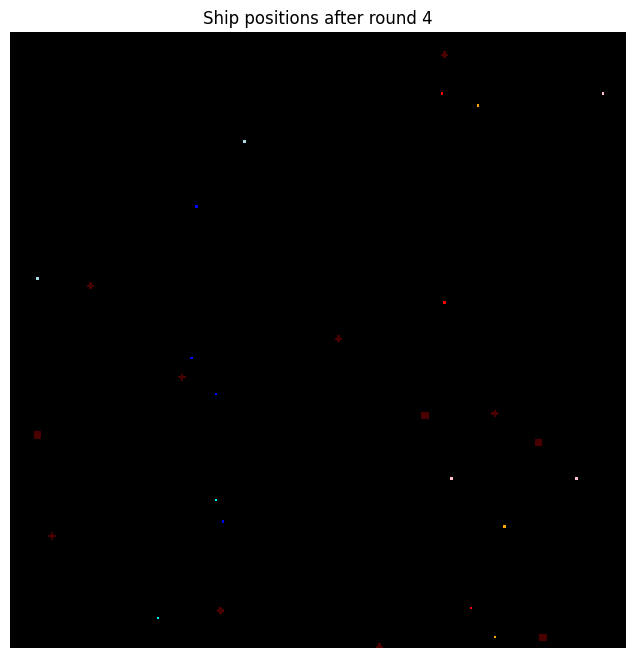


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (197, 77)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (202, 243)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (229, 147)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (254, 143)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (182, 34)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (21, 63)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (178, 25)
Ship ID 16 (B small) moved to position (246, 23)
Ship ID 14 (B medium) moved to position (193, 31)
Ship ID 9 (B large) moved to position (181, 115)
Ship ID 17 (B small) moved to position (182, 185)
Ship ID 15 (B small) moved to position (236, 186)
Ship ID 13 (B medium) moved to position (207, 204)
Ship ID 11 (B large) moved to position (190, 237

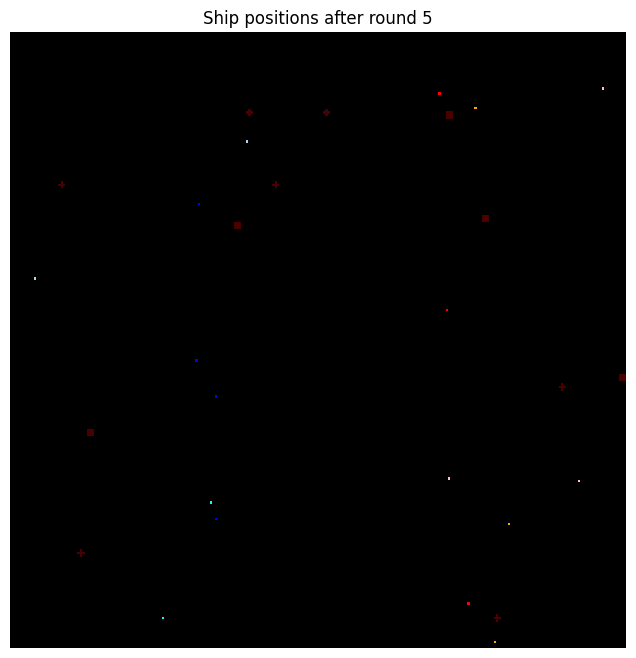


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (180, 127)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (207, 4)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (196, 32)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (226, 40)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (139, 19)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (179, 243)

---- Player B's Defense ----
Ship ID 16 (B small) moved to position (246, 21)
Ship ID 10 (B large) moved to position (177, 23)
Ship ID 14 (B medium) moved to position (193, 34)
Ship ID 9 (B large) moved to position (183, 116)
Ship ID 17 (B small) moved to position (182, 184)
Ship ID 15 (B small) moved to position (238, 186)
Ship ID 13 (B medium) moved to position (206, 204)
Ship ID 11 (B large) moved to position (192, 239)

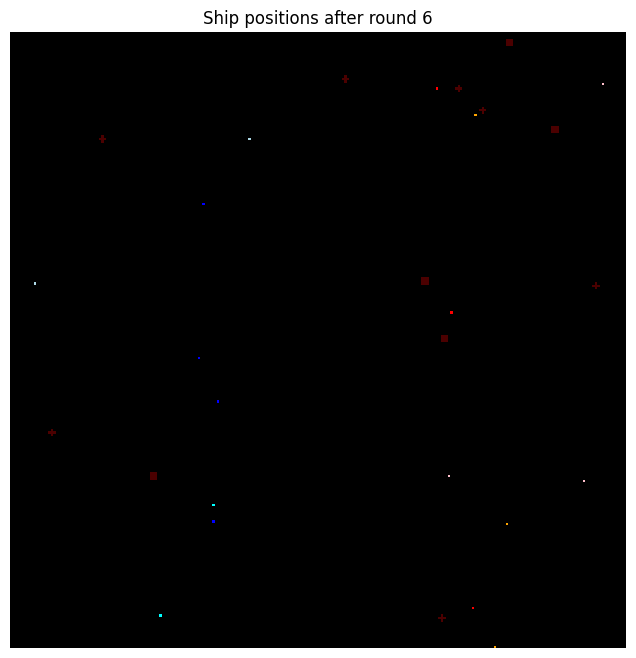


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (66, 43)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (166, 120)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (14, 7)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (207, 96)

---- Player B's Defense ----
Ship ID 16 (B small) moved to position (245, 21)
Ship ID 10 (B large) moved to position (175, 22)
Ship ID 14 (B medium) moved to position (192, 36)
Ship ID 9 (B large) moved to position (184, 115)
Ship ID 17 (B small) moved to position (182, 185)
Ship ID 15 (B small) moved to position (237, 187)
Ship ID 13 (B medium) moved to position (203, 204)
Ship ID 11 (B large) moved to position (194, 237)
Ship ID 12 (B medium) moved to position (203, 254)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked position (66, 43), but hit nothing.
Ship ID 1 remaining sonic missiles: 1
S

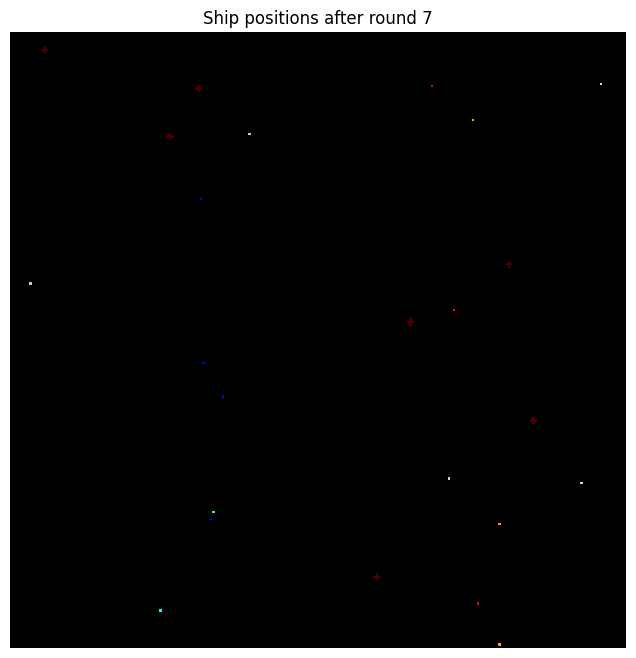


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (87, 179)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (249, 197)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (127, 92)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (4, 71)

---- Player B's Defense ----
Ship ID 16 (B small) moved to position (245, 22)
Ship ID 10 (B large) moved to position (176, 21)
Ship ID 14 (B medium) moved to position (194, 36)
Ship ID 9 (B large) moved to position (183, 112)
Ship ID 17 (B small) moved to position (183, 186)
Ship ID 15 (B small) moved to position (239, 187)
Ship ID 13 (B medium) moved to position (203, 202)
Ship ID 11 (B large) moved to position (193, 234)
Ship ID 12 (B medium) moved to position (202, 255)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked position (87, 179), but hit nothing.
Ship ID 1 remaining hyperso

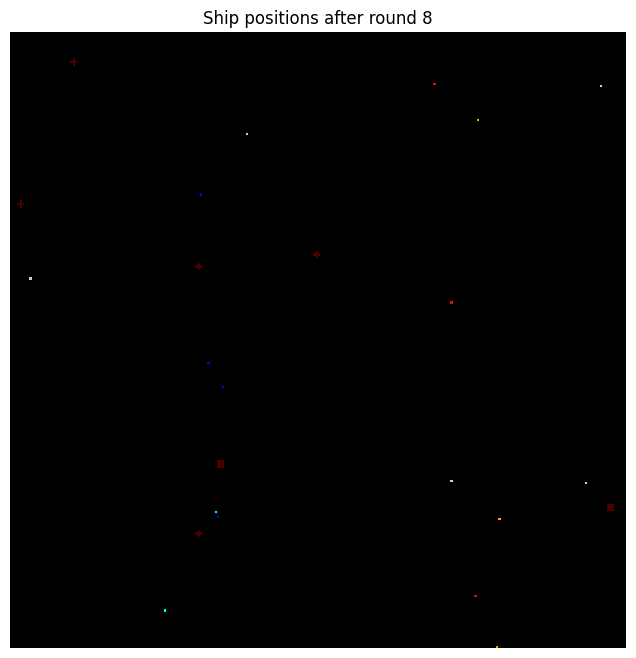


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (234, 123)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (105, 87)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (150, 0)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (42, 175)

---- Player B's Defense ----
Ship ID 10 (B large) moved to position (175, 24)
Ship ID 16 (B small) moved to position (247, 22)
Ship ID 14 (B medium) moved to position (195, 34)
Ship ID 9 (B large) moved to position (180, 111)
Ship ID 17 (B small) moved to position (182, 187)
Ship ID 15 (B small) moved to position (240, 188)
Ship ID 13 (B medium) moved to position (202, 202)
Ship ID 11 (B large) moved to position (191, 233)
Ship ID 12 (B medium) moved to position (203, 253)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked position (234, 123), but hit nothing.
Ship ID 1 remaining sonic

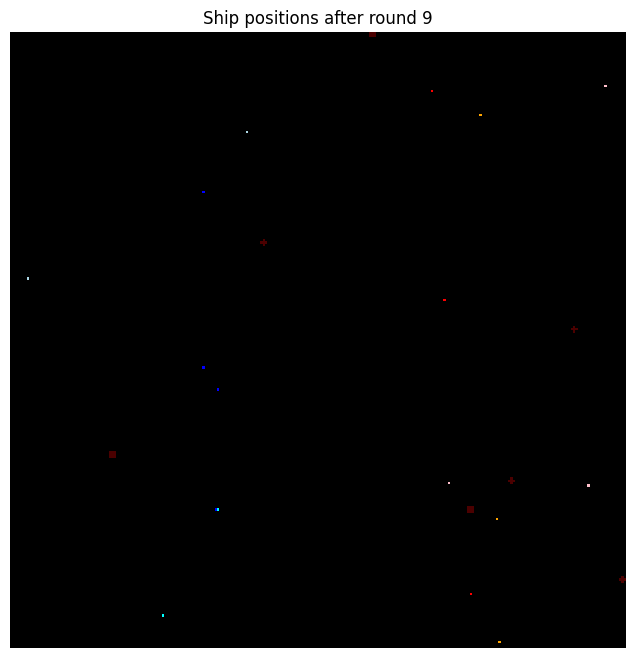


===== Round 10 begins =====

---- Player A's Attack ----

---- Player B's Defense ----
Ship ID 16 (B small) moved to position (249, 22)
Ship ID 10 (B large) moved to position (174, 26)
Ship ID 14 (B medium) moved to position (194, 33)
Ship ID 9 (B large) moved to position (182, 113)
Ship ID 17 (B small) moved to position (182, 186)
Ship ID 15 (B small) moved to position (240, 190)
Ship ID 13 (B medium) moved to position (203, 203)
Ship ID 11 (B large) moved to position (190, 230)
Ship ID 12 (B medium) moved to position (202, 254)

---- Resolving Player A's Attacks ----

---- Player B's Attack ----

---- Player A's Defense ----
Ship ID 8 (A small) moved to position (98, 43)
Ship ID 1 (A large) moved to position (78, 64)
Ship ID 7 (A small) moved to position (6, 101)
Ship ID 2 (A large) moved to position (81, 138)
Ship ID 4 (A large) moved to position (86, 150)
Ship ID 3 (A large) moved to position (84, 195)
Ship ID 6 (A medium) moved to position (87, 198)
Ship ID 5 (A medium) moved to 

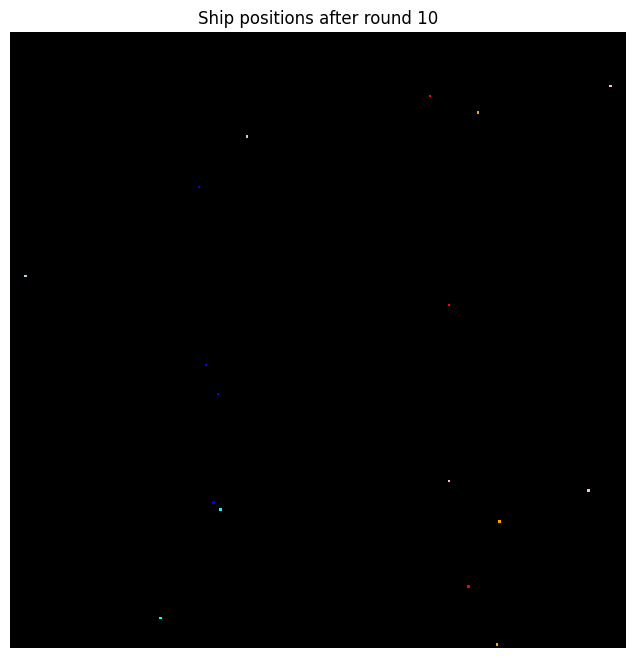

Game over!
Player A remaining ships: 8
Player B remaining ships: 9
Player B wins!


In [2]:
# Initialize the game
def initialize_game():
    game_map = GameMap(MAP_SIZE)

    ships = []

    ship_id = 1  # Unique identifier for each ship

    # Player A ship configuration: 4 large, 2 medium, 2 small ships
    player_A_ships = [
        ('large', 4),
        ('medium', 2),
        ('small', 2),
    ]

    # Player B ship configuration: 3 large, 3 medium, 3 small ships
    player_B_ships = [
        ('large', 3),
        ('medium', 3),
        ('small', 3),
    ]

    # Place Player A ships on the left half
    for ship_type, count in player_A_ships:
        for _ in range(count):
            position = get_random_position(game_map, side='left')
            ship = Ship(ship_id, ship_type, position, owner='A')
            game_map.place_ship(ship)
            ships.append(ship)
            ship_id += 1

    # Place Player B ships on the right half
    for ship_type, count in player_B_ships:
        for _ in range(count):
            position = get_random_position(game_map, side='right')
            ship = Ship(ship_id, ship_type, position, owner='B')
            game_map.place_ship(ship)
            ships.append(ship)
            ship_id += 1

    return game_map, ships

# Helper function: Get a random position
def get_random_position(game_map, side=None):
    max_attempts = 10000
    attempts = 0
    while attempts < max_attempts:
        if side == 'left':
            x = random.randint(0, game_map.size // 2 - 1)
        elif side == 'right':
            x = random.randint(game_map.size // 2, game_map.size - 1)
        else:
            x = random.randint(0, game_map.size - 1)
        y = random.randint(0, game_map.size - 1)
        if game_map.grid[y][x] is None:
            return (x, y)
        attempts += 1
    raise RuntimeError("Failed to find an empty position on the map.")

# Attack phase function
def attack_phase(attacker_ships, defender_ships, game_map):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    attacks = []  # Store attack information

    for ship in alive_attackers:
        # Choose available weapons
        available_weapons = ship.available_weapons()
        if not available_weapons:
            continue  # No weapons available, skip

        # Randomly choose a weapon
        weapon_type = random.choice(available_weapons)
        weapon = Weapon(weapon_type)

        # Randomly choose attack coordinates
        attack_x = random.randint(0, game_map.size - 1)
        attack_y = random.randint(0, game_map.size - 1)
        attack_position = (attack_x, attack_y)

        # Store attack information for later resolution
        attacks.append({
            'attacker_ship': ship,
            'weapon': weapon,
            'attack_position': attack_position,
            'attack_positions': []  # Will be filled during resolution
        })

        # Print attack information
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) is preparing to use {weapon.weapon_type} missile to attack position {attack_position}")

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship (ships can choose to stay in the same place)
        move_ship_randomly(ship, game_map)

# Resolve attacks function
def resolve_attacks(attacks, game_map):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map)
        attack['attack_positions'] = affected_positions
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
            print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target)
                print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Move ship randomly function
def move_ship_randomly(ship, game_map):
    attempts = 0
    moved = False
    original_position = ship.position
    while attempts < ship.max_move_attempts:
        dx = random.randint(-ship.move_range, ship.move_range)
        dy = random.randint(-ship.move_range, ship.move_range)
        # Allow staying in the same place (dx == 0 and dy == 0)
        if abs(dx) + abs(dy) > ship.move_range:
            continue  # Exceeds move range, try again
        new_x = ship.position[0] + dx
        new_y = ship.position[1] + dy
        if game_map.is_within_bounds(new_x, new_y) and game_map.grid[new_y][new_x] is None:
            moved = game_map.move_ship(ship, (new_x, new_y))
            break  # Successfully moved
        attempts += 1
    if not moved:
        # Could not find a new position; stay in the same place
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) stays at position ({ship.position[0]}, {ship.position[1]})")

# Visualize game function
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function
def run_game():
    game_map, ships = initialize_game()
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map)
        print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map)
        print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            print("All Player B's ships have been destroyed. Player A wins!")
            visualize_game(game_map, round_number, weapon_areas_A)
            return

        # Player B attacks, Player A defends
        print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map)
        print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map)
        print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            print("All Player A's ships have been destroyed. Player B wins!")
            visualize_game(game_map, round_number, weapon_areas_B)
            return

        # Visualize current state with weapon coverage areas
        # Combine weapon areas from both players
        combined_weapon_areas = weapon_areas_A + weapon_areas_B
        visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        print(f"Game over!")
        print(f"Player A remaining ships: {ships_A_remaining}")
        print(f"Player B remaining ships: {ships_B_remaining}")
        if ships_A_remaining > ships_B_remaining:
            print("Player A wins!")
        elif ships_B_remaining > ships_A_remaining:
            print("Player B wins!")
        else:
            print("It's a draw!")

# Run the game
run_game()


### **攻擊船可能抵達的地方**


### Simulation 1 ###
Placed Ship ID 1 (A large) at position (77, 80)
Placed Ship ID 2 (A large) at position (77, 79)
Placed Ship ID 3 (A large) at position (53, 211)
Placed Ship ID 4 (A large) at position (9, 227)
Placed Ship ID 5 (A medium) at position (40, 219)
Placed Ship ID 6 (A medium) at position (115, 7)
Placed Ship ID 7 (A small) at position (14, 75)
Placed Ship ID 8 (A small) at position (79, 245)
Placed Ship ID 9 (B large) at position (216, 224)
Placed Ship ID 10 (B large) at position (222, 248)
Placed Ship ID 11 (B large) at position (242, 88)
Placed Ship ID 12 (B medium) at position (189, 251)
Placed Ship ID 13 (B medium) at position (220, 50)
Placed Ship ID 14 (B medium) at position (157, 167)
Placed Ship ID 15 (B small) at position (162, 84)
Placed Ship ID 16 (B small) at position (221, 31)
Placed Ship ID 17 (B small) at position (200, 87)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack positi

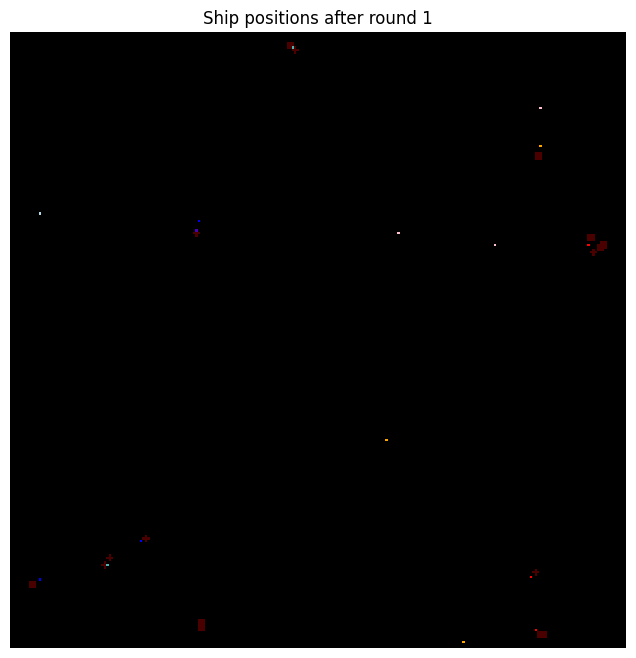


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (186, 252)
Ship ID 7 (A small) is preparing to use hypersonic missile to attack position (220, 47)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (153, 169)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (201, 86)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (220, 44)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (215, 226)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (155, 168)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (220, 31) to (218, 31)
Ship ID 13 (B medium) moved from (220, 47) to (222, 47)
Ship ID 15 (B small) moved from (161, 83) to (162, 84)
Ship ID 17 (B small) moved from (201, 88) to (201, 90)
Ship ID 11 (B large) moved from (240, 88) to (237, 88)
Ship ID 14 (B medium) moved from (156, 1

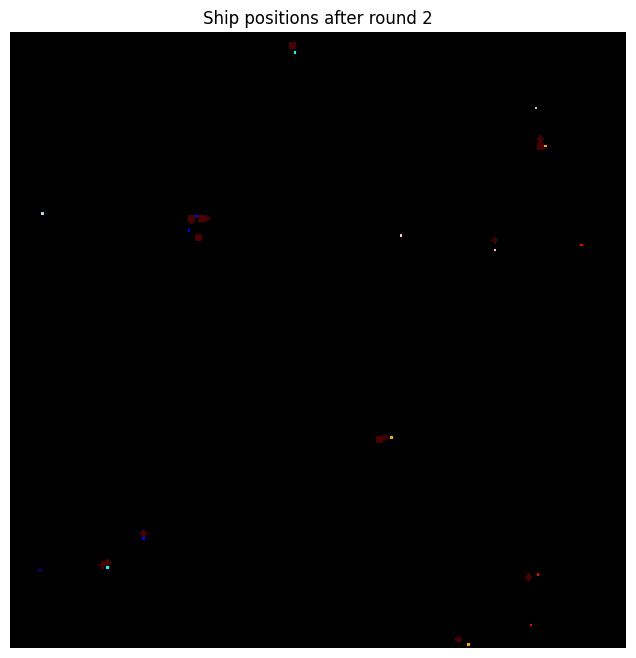


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (215, 247)
Ship ID 7 (A small) is preparing to use hypersonic missile to attack position (240, 87)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (238, 90)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (216, 226)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (234, 87)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (222, 45)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (220, 246)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (218, 31) to (217, 32)
Ship ID 13 (B medium) moved from (222, 47) to (223, 48)
Ship ID 15 (B small) moved from (162, 84) to (164, 84)
Ship ID 11 (B large) moved from (237, 88) to (237, 91)
Ship ID 17 (B small) moved from (201, 90) to (202, 89)
Ship ID 14 (B medium) move

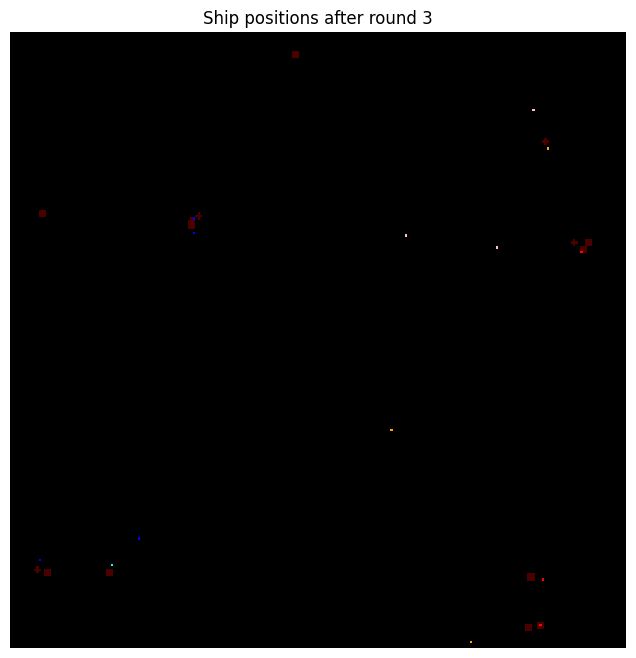


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (219, 247)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (220, 228)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (225, 48)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (159, 166)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (160, 164)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (217, 32) to (217, 33)
Ship ID 13 (B medium) moved from (223, 48) to (223, 51)
Ship ID 15 (B small) moved from (164, 84) to (164, 83)
Ship ID 17 (B small) moved from (202, 89) to (202, 90)
Ship ID 11 (B large) moved from (237, 91) to (235, 90)
Ship ID 14 (B medium) moved from (158, 165) to (159, 166)
Ship ID 9 (B large) moved from (221, 227) to (223, 228)
Ship ID 10 (B large) moved from (220, 246) to (223, 247)
Ship ID 12 (B medium) moved fro

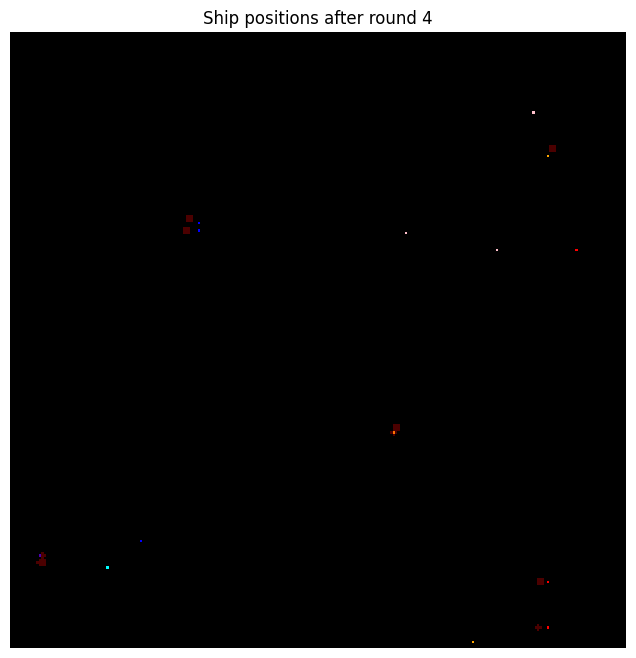


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (238, 89)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (225, 230)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (222, 49)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (217, 35)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (235, 94)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (217, 33) to (215, 33)
Ship ID 13 (B medium) moved from (223, 51) to (225, 50)
Ship ID 15 (B small) moved from (164, 83) to (165, 83)
Ship ID 17 (B small) moved from (202, 90) to (204, 90)
Ship ID 11 (B large) moved from (235, 90) to (234, 88)
Ship ID 14 (B medium) moved from (159, 166) to (158, 164)
Ship ID 9 (B large) moved from (223, 228) to (224, 231)
Ship ID 10 (B large) moved from (223, 247) to (225, 249)
Ship ID 12 (B medium) moved from (192, 

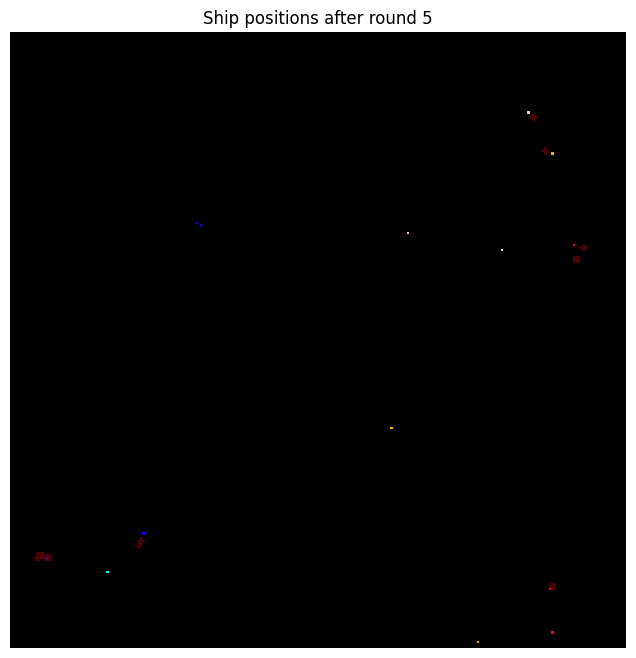


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (160, 164)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (226, 230)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (225, 230)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (231, 88)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (226, 233)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (215, 33) to (216, 33)
Ship ID 13 (B medium) moved from (225, 50) to (225, 48)
Ship ID 15 (B small) moved from (165, 83) to (165, 85)
Ship ID 11 (B large) moved from (234, 88) to (233, 87)
Ship ID 17 (B small) moved from (204, 90) to (205, 90)
Ship ID 14 (B medium) moved from (158, 164) to (158, 165)
Ship ID 9 (B large) moved from (224, 231) to (225, 231)
Ship ID 10 (B large) moved from (225, 249) to (223, 251)
Ship ID 12 (B medium) moved from (194, 25

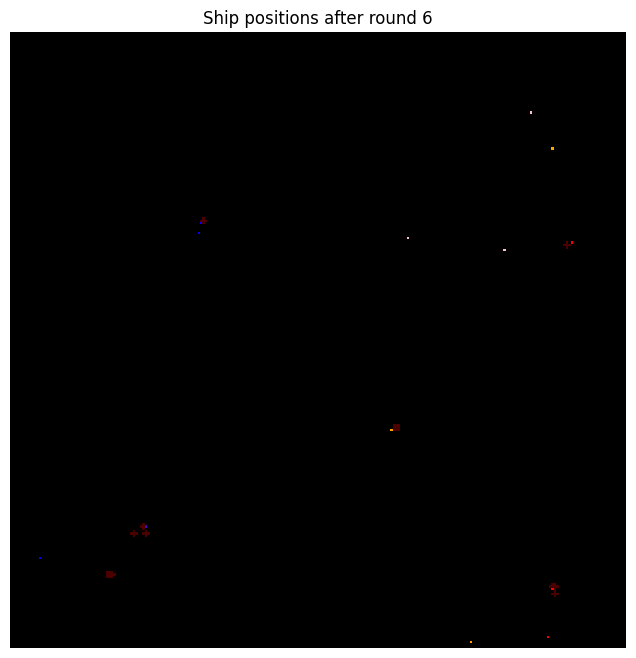


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (193, 254)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (228, 231)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (225, 231)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (192, 255)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (216, 33) to (217, 34)
Ship ID 13 (B medium) moved from (225, 48) to (225, 46)
Ship ID 15 (B small) moved from (165, 85) to (164, 84)
Ship ID 11 (B large) moved from (233, 87) to (233, 84)
Ship ID 17 (B small) moved from (205, 90) to (204, 89)
Ship ID 14 (B medium) moved from (158, 165) to (157, 163)
Ship ID 9 (B large) moved from (225, 231) to (224, 231)
Ship ID 10 (B large) moved from (223, 251) to (223, 255)
Ship ID 12 (B medium) moved from (191, 253) to (193, 254)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked pos

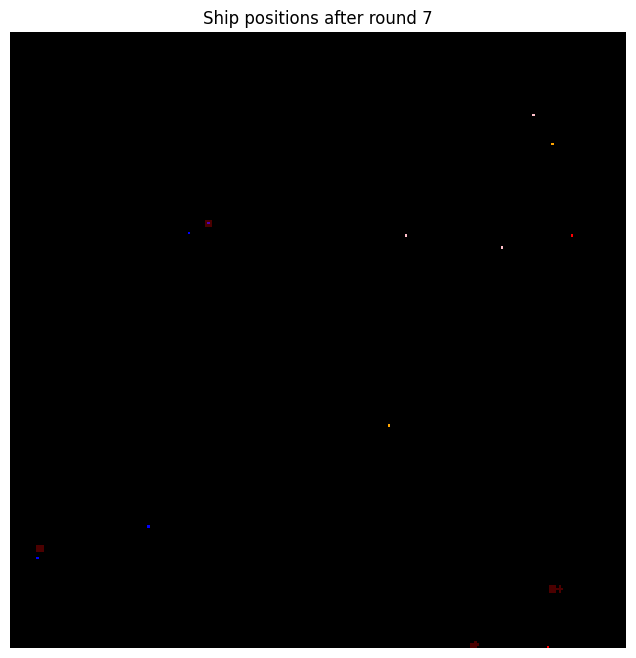


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (202, 89)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (224, 47)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (236, 84)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (163, 83)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (217, 34) to (218, 33)
Ship ID 13 (B medium) moved from (225, 46) to (227, 47)
Ship ID 15 (B small) moved from (164, 84) to (165, 83)
Ship ID 11 (B large) moved from (233, 84) to (237, 84)
Ship ID 17 (B small) moved from (204, 89) to (203, 90)
Ship ID 14 (B medium) moved from (157, 163) to (158, 162)
Ship ID 10 (B large) moved from (223, 255) to (224, 252)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked position (202, 89), but hit nothing.
Ship ID 1 remaining sonic missiles: 1
Ship ID 2 attacked position (224, 47), but hit noth

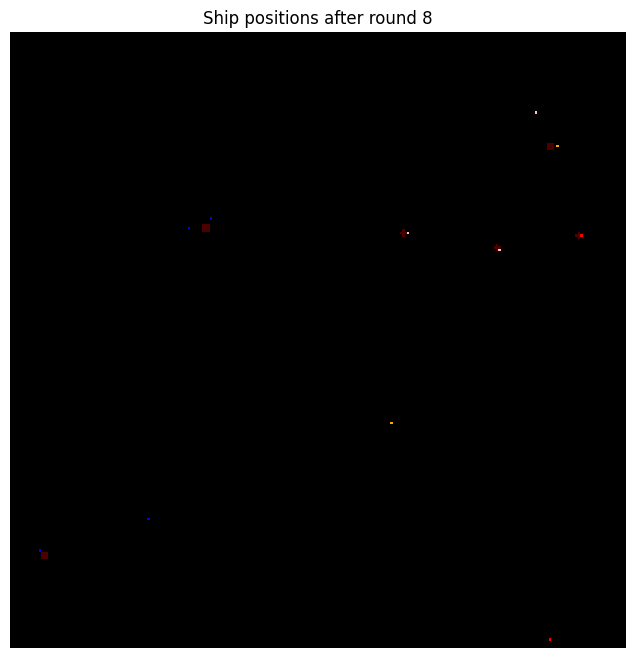


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) is preparing to use sonic missile to attack position (236, 81)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (236, 84)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (227, 45)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (224, 249)

---- Player B's Defense ----
Ship ID 16 (B small) moved from (218, 33) to (218, 31)
Ship ID 13 (B medium) moved from (227, 47) to (226, 45)
Ship ID 15 (B small) moved from (165, 83) to (166, 82)
Ship ID 11 (B large) moved from (237, 84) to (236, 85)
Ship ID 17 (B small) moved from (203, 90) to (203, 92)
Ship ID 14 (B medium) moved from (158, 162) to (155, 162)
Ship ID 10 (B large) moved from (224, 252) to (222, 251)

---- Resolving Player A's Attacks ----
Ship ID 1 attacked position (236, 81), but hit nothing.
Ship ID 1 remaining sonic missiles: 0
Ship ID 2 attacked position (236, 84), hit en

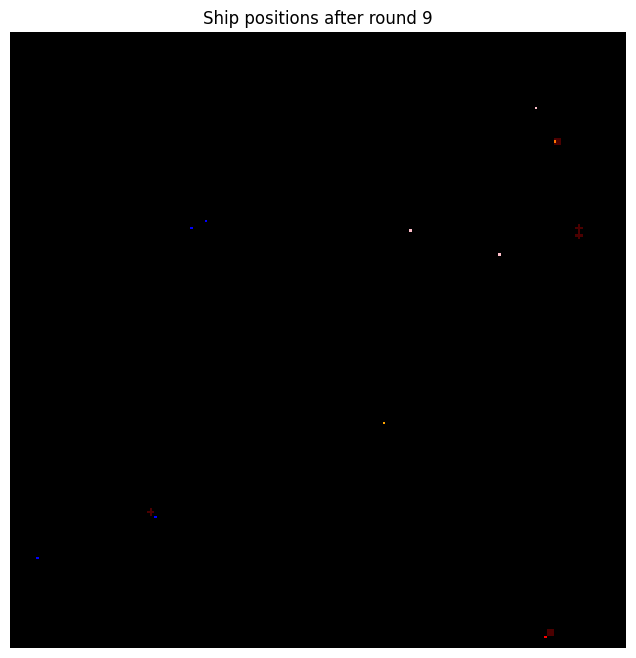


===== Round 10 begins =====

---- Player A's Attack ----
Ship ID 1 (A large) has no available weapons and skips attack.
Ship ID 2 (A large) has no available weapons and skips attack.
Ship ID 3 (A large) has no available weapons and skips attack.
Ship ID 4 (A large) has no available weapons and skips attack.

---- Player B's Defense ----
Ship ID 16 (B small) moved from (218, 31) to (216, 31)
Ship ID 13 (B medium) moved from (226, 45) to (226, 44)
Ship ID 15 (B small) moved from (166, 82) to (167, 83)
Ship ID 17 (B small) moved from (203, 92) to (203, 91)
Ship ID 14 (B medium) moved from (155, 162) to (157, 163)
Ship ID 10 (B large) moved from (222, 251) to (220, 249)

---- Resolving Player A's Attacks ----

---- Player B's Attack ----
Ship ID 16 (B small) has no available weapons and skips attack.
Ship ID 13 (B medium) has no available weapons and skips attack.
Ship ID 15 (B small) has no available weapons and skips attack.
Ship ID 17 (B small) has no available weapons and skips attack

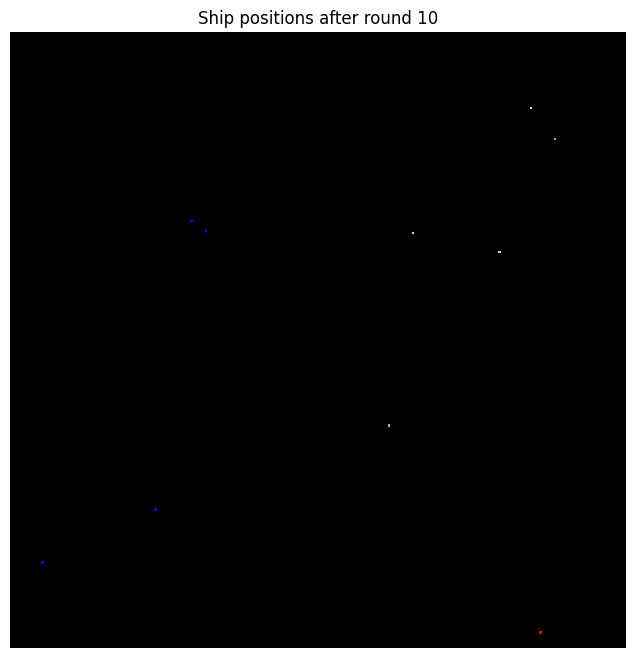

Game over!
Player A remaining ships: 4
Player B remaining ships: 6


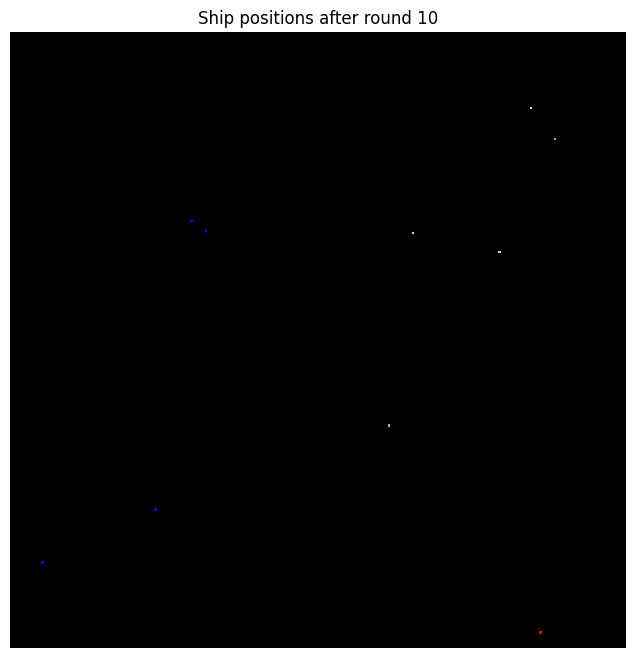


### Aggregated Results After 1000 Simulations ###
Total remaining ships of Player A: 5621
Total remaining ships of Player B: 5604
Average remaining ships of Player A per simulation: 5.62
Average remaining ships of Player B per simulation: 5.60


In [3]:
# Define GameMap class
class GameMap:
    def __init__(self, size):
        self.size = size
        # Initialize grid with None
        self.grid = [[None for _ in range(size)] for _ in range(size)]

    def place_ship(self, ship, verbose=False):
        x, y = ship.position
        if self.is_within_bounds(x, y):
            if self.grid[y][x] is None:
                self.grid[y][x] = ship
                if verbose:
                    print(f"Placed Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) at position ({x}, {y})")
            else:
                raise ValueError(f"Position ({x}, {y}) is already occupied by another ship.")
        else:
            raise ValueError(f"Position ({x}, {y}) is out of bounds.")

    def move_ship(self, ship, new_position, verbose=False):
        old_x, old_y = ship.position
        new_x, new_y = new_position
        if self.is_within_bounds(new_x, new_y):
            if self.grid[new_y][new_x] is None:
                self.grid[old_y][old_x] = None
                self.grid[new_y][new_x] = ship
                ship.position = (new_x, new_y)
                if verbose:
                    print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) moved from ({old_x}, {old_y}) to ({new_x}, {new_y})")
                return True
            else:
                # Target position is occupied; cannot move
                if verbose:
                    print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) failed to move to ({new_x}, {new_y}) - Position occupied.")
                return False
        else:
            # Target position is out of bounds; cannot move
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) failed to move to ({new_x}, {new_y}) - Out of bounds.")
            return False

    def is_within_bounds(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size

    def remove_ship(self, ship, verbose=False):
        x, y = ship.position
        self.grid[y][x] = None
        if verbose:
            print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) removed from position ({x}, {y})")

    def get_ships_by_owner(self, owner):
        ships = []
        for row in self.grid:
            for cell in row:
                if cell is not None and cell.owner == owner and cell.alive:
                    ships.append(cell)
        return ships

    def get_all_ships(self):
        ships = []
        for row in self.grid:
            for cell in row:
                if cell is not None and cell.alive:
                    ships.append(cell)
        return ships

# Initialize the game
def initialize_game(verbose=False):
    game_map = GameMap(MAP_SIZE)

    ships = []

    ship_id = 1  # Unique identifier for each ship

    # Player A ship configuration: 4 large, 2 medium, 2 small ships
    player_A_ships = [
        ('large', 4),
        ('medium', 2),
        ('small', 2),
    ]

    # Player B ship configuration: 3 large, 3 medium, 3 small ships
    player_B_ships = [
        ('large', 3),
        ('medium', 3),
        ('small', 3),
    ]

    # Place Player A ships on the left half
    for ship_type, count in player_A_ships:
        for _ in range(count):
            position = get_random_position(game_map, side='left')
            ship = Ship(ship_id, ship_type, position, owner='A')
            game_map.place_ship(ship, verbose=verbose)
            ships.append(ship)
            ship_id += 1

    # Place Player B ships on the right half
    for ship_type, count in player_B_ships:
        for _ in range(count):
            position = get_random_position(game_map, side='right')
            ship = Ship(ship_id, ship_type, position, owner='B')
            game_map.place_ship(ship, verbose=verbose)
            ships.append(ship)
            ship_id += 1

    return game_map, ships

# Helper function: Get a random position
def get_random_position(game_map, side=None):
    max_attempts = 10000
    attempts = 0
    while attempts < max_attempts:
        if side == 'left':
            x = random.randint(0, game_map.size // 2 - 1)
        elif side == 'right':
            x = random.randint(game_map.size // 2, game_map.size - 1)
        else:
            x = random.randint(0, game_map.size - 1)
        y = random.randint(0, game_map.size - 1)
        if game_map.grid[y][x] is None:
            return (x, y)
        attempts += 1
    raise RuntimeError("Failed to find an empty position on the map.")

# Attack phase function with enhanced strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    attacks = []  # Store attack information

    # Calculate potential attack positions based on enemy current and reachable positions
    potential_attack_positions = set()
    for defender in alive_defenders:
        current_pos = defender.position
        reachable_positions = get_reachable_positions(defender, game_map)
        potential_attack_positions.add(current_pos)
        potential_attack_positions.update(reachable_positions)

    if not potential_attack_positions:
        # If no potential positions, fallback to random attack
        if verbose:
            print("No potential attack positions identified. Falling back to random attacks.")
        for ship in alive_attackers:
            available_weapons = ship.available_weapons()
            if not available_weapons:
                if verbose:
                    print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) has no available weapons and skips attack.")
                continue  # No weapons available, skip

            weapon_type = random.choice(available_weapons)
            weapon = Weapon(weapon_type)

            # Random attack position
            attack_x = random.randint(0, game_map.size - 1)
            attack_y = random.randint(0, game_map.size - 1)
            attack_position = (attack_x, attack_y)

            attacks.append({
                'attacker_ship': ship,
                'weapon': weapon,
                'attack_position': attack_position
            })

            # Print attack information
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) is preparing to use {weapon.weapon_type} missile to attack position {attack_position}")

        return attacks, alive_defenders

    # For each attacker ship, select an attack position from potential_attack_positions
    for ship in alive_attackers:
        available_weapons = ship.available_weapons()
        if not available_weapons:
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) has no available weapons and skips attack.")
            continue  # No weapons available, skip

        # Randomly choose a weapon
        weapon_type = random.choice(available_weapons)
        weapon = Weapon(weapon_type)

        # Select an attack position from potential_attack_positions
        attack_position = random.choice(list(potential_attack_positions))

        attacks.append({
            'attacker_ship': ship,
            'weapon': weapon,
            'attack_position': attack_position
        })

        # Print attack information
        if verbose:
            print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) is preparing to use {weapon.weapon_type} missile to attack position {attack_position}")

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship (ships can choose to stay in the same place)
        move_ship_randomly(ship, game_map, verbose=verbose)

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Move ship randomly function
def move_ship_randomly(ship, game_map, verbose=False):
    attempts = 0
    moved = False
    original_position = ship.position
    while attempts < ship.max_move_attempts:
        dx = random.randint(-ship.move_range, ship.move_range)
        dy = random.randint(-ship.move_range, ship.move_range)
        # Allow staying in the same place (dx == 0 and dy == 0)
        if abs(dx) + abs(dy) > ship.move_range:
            continue  # Exceeds move range, try again
        new_x = ship.position[0] + dx
        new_y = ship.position[1] + dy
        if game_map.is_within_bounds(new_x, new_y) and game_map.grid[new_y][new_x] is None:
            moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
            break  # Successfully moved
        attempts += 1
    if not moved and verbose:
        # Could not find a new position; stay in the same place
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) stays at position ({ship.position[0]}, {ship.position[1]})")

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        if verbose:
            print(f"Game over!")
            print(f"Player A remaining ships: {ships_A_remaining}")
            print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(1000)


### **優先攻擊小船**


### Simulation 1 ###
Placed Ship ID 1 (A large) at position (6, 87)
Placed Ship ID 2 (A large) at position (66, 63)
Placed Ship ID 3 (A large) at position (43, 223)
Placed Ship ID 4 (A large) at position (75, 100)
Placed Ship ID 5 (A medium) at position (36, 228)
Placed Ship ID 6 (A medium) at position (74, 214)
Placed Ship ID 7 (A small) at position (1, 198)
Placed Ship ID 8 (A small) at position (39, 162)
Placed Ship ID 9 (B large) at position (159, 10)
Placed Ship ID 10 (B large) at position (194, 252)
Placed Ship ID 11 (B large) at position (200, 19)
Placed Ship ID 12 (B medium) at position (195, 144)
Placed Ship ID 13 (B medium) at position (247, 193)
Placed Ship ID 14 (B medium) at position (217, 100)
Placed Ship ID 15 (B small) at position (226, 168)
Placed Ship ID 16 (B small) at position (244, 249)
Placed Ship ID 17 (B small) at position (180, 128)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack pos

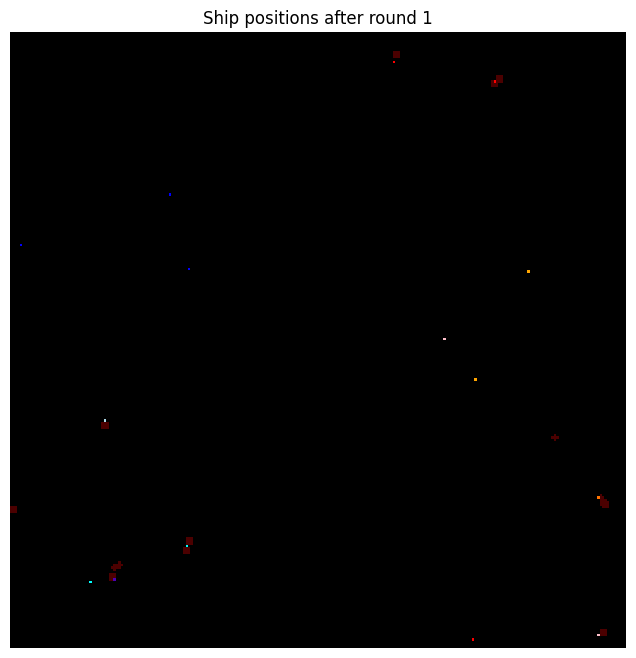


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (193, 254)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (181, 126)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (163, 12)
Ship ID 8 (A small) is preparing to use hypersonic missile to attack position (157, 10)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (244, 194)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (193, 249)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (193, 142)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (159, 12) to (160, 9)
Ship ID 11 (B large) moved from (201, 20) to (202, 18)
Ship ID 14 (B medium) moved from (215, 99) to (214, 100)
Ship ID 17 (B small) moved from (180, 127) to (179, 126)
Ship ID 12 (B medium) moved from (193, 144) to (194, 146)
Ship ID 13 (B medium) mov

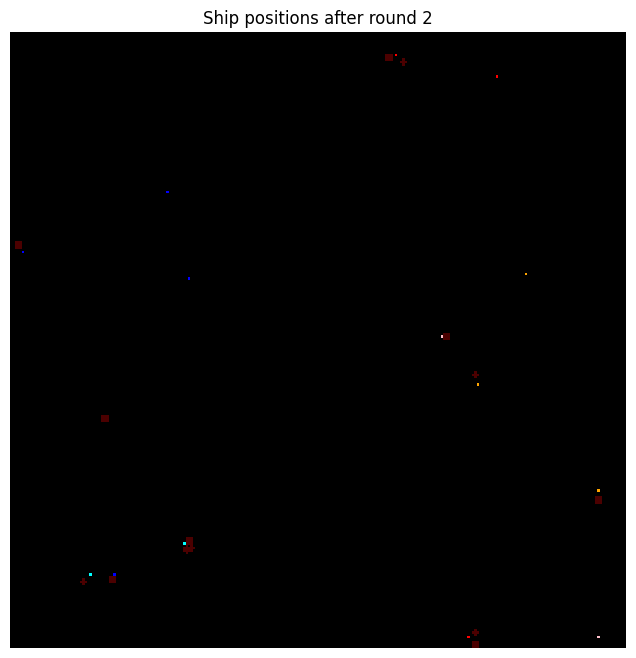


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (215, 102)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (161, 9)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (214, 99)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (157, 10)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (245, 251)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (214, 97)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (160, 9) to (157, 9)
Ship ID 11 (B large) moved from (202, 18) to (200, 18)
Ship ID 14 (B medium) moved from (214, 100) to (215, 99)
Ship ID 17 (B small) moved from (179, 126) to (180, 127)
Ship ID 12 (B medium) moved from (194, 146) to (197, 146)
Ship ID 13 (B medium) moved from (244, 190) to (246, 191)
Ship ID 10 (B large) moved from (190, 251) to (189, 252)
Shi

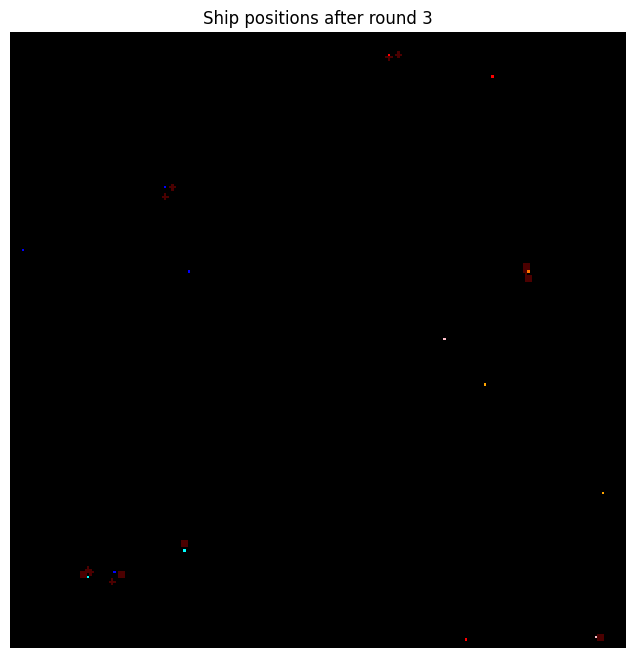


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (245, 193)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (244, 250)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (245, 189)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (154, 10)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (180, 126)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (215, 99)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (157, 9) to (158, 6)
Ship ID 11 (B large) moved from (200, 18) to (202, 17)
Ship ID 14 (B medium) moved from (215, 99) to (216, 100)
Ship ID 17 (B small) moved from (180, 127) to (181, 126)
Ship ID 12 (B medium) moved from (197, 146) to (196, 144)
Ship ID 13 (B medium) moved from (246, 191) to (246, 193)
Ship ID 16 (B small) moved from (243, 251) to (245, 251)
Ship ID 10

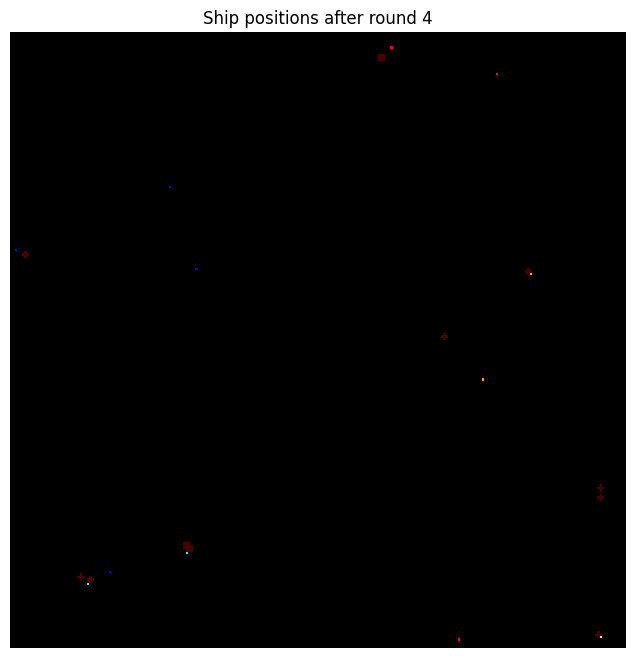


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (161, 7)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (160, 8)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (244, 252)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (247, 251)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (196, 144)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (245, 251)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (158, 6) to (156, 5)
Ship ID 11 (B large) moved from (202, 17) to (200, 19)
Ship ID 14 (B medium) moved from (216, 100) to (218, 100)
Ship ID 12 (B medium) moved from (196, 144) to (198, 143)
Ship ID 16 (B small) moved from (245, 251) to (245, 249)
Ship ID 10 (B large) moved from (186, 252) to (188, 251)

---- Resolving Player A's Attacks ----
Ship ID 2 attacked posit

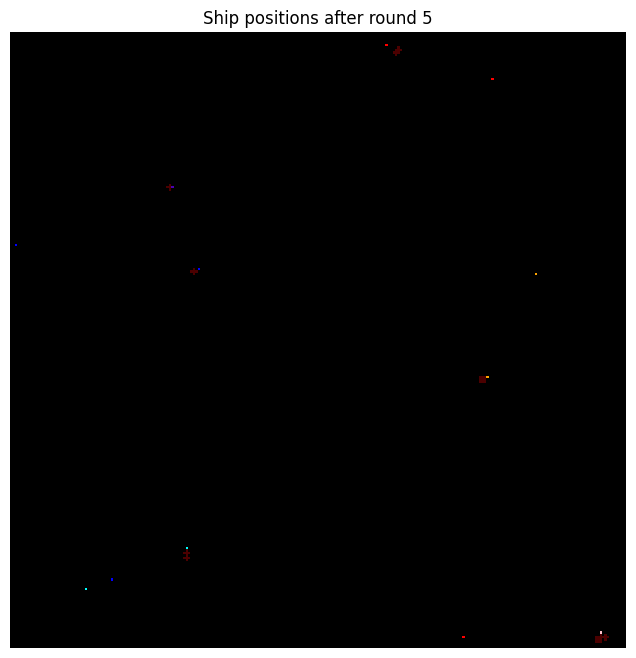


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (217, 100)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (220, 99)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (219, 102)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (198, 142)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (246, 248)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (188, 251)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (156, 5) to (156, 7)
Ship ID 11 (B large) moved from (200, 19) to (197, 18)
Ship ID 14 (B medium) moved from (218, 100) to (219, 99)
Ship ID 12 (B medium) moved from (198, 143) to (197, 145)
Ship ID 16 (B small) moved from (245, 249) to (245, 248)
Ship ID 10 (B large) moved from (188, 251) to (189, 254)

---- Resolving Player A's Attacks ----
Ship ID 2 attacked pos

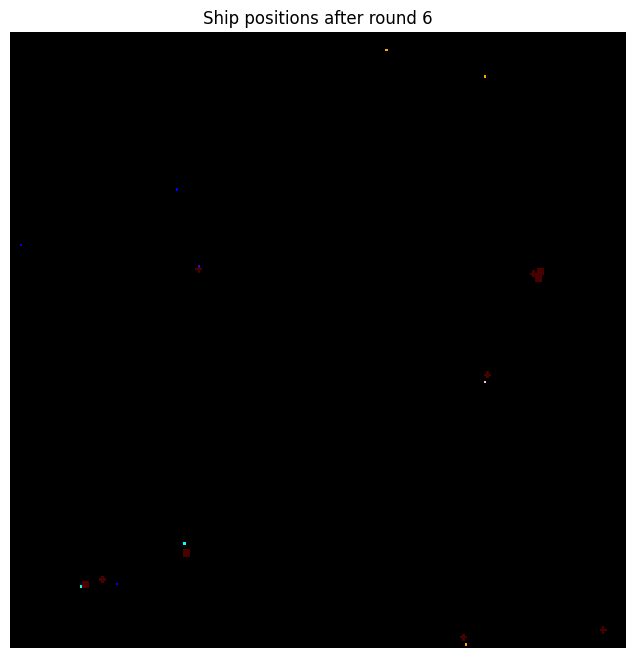


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (198, 144)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (197, 145)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (156, 4)
Ship ID 6 (A medium) has no available weapons and skips attack.
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (197, 22)
Ship ID 5 (A medium) has no available weapons and skips attack.

---- Player B's Defense ----
Ship ID 9 (B large) moved from (156, 7) to (155, 4)
Ship ID 11 (B large) moved from (197, 18) to (197, 20)
Ship ID 12 (B medium) moved from (197, 145) to (196, 147)
Ship ID 10 (B large) moved from (189, 254) to (189, 255)

---- Resolving Player A's Attacks ----
Ship ID 2 attacked position (198, 144), but hit nothing.
Ship ID 2 remaining sonic missiles: 1
Ship ID 1 attacked position (197, 145), but hit nothing.
Ship ID 1 remaining sonic mi

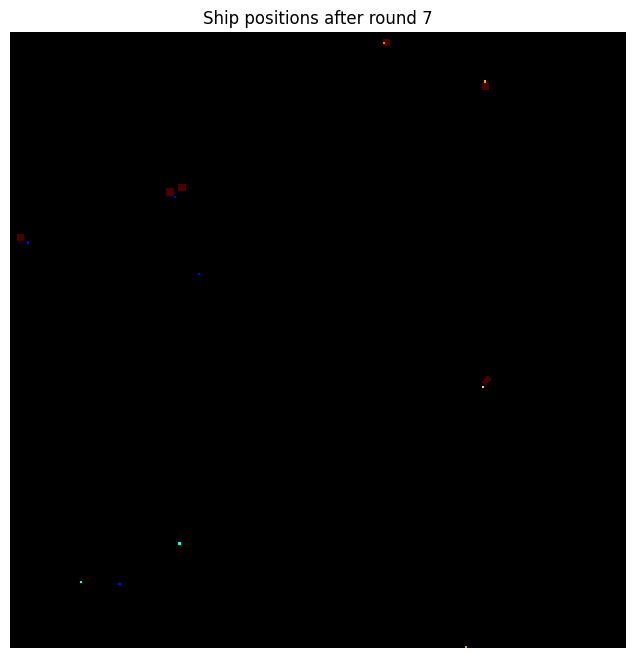


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (159, 4)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (198, 17)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (200, 19)
Ship ID 6 (A medium) has no available weapons and skips attack.
Ship ID 5 (A medium) has no available weapons and skips attack.
Ship ID 3 (A large) is preparing to use sonic missile to attack position (195, 145)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (155, 4) to (159, 4)
Ship ID 11 (B large) moved from (197, 20) to (197, 23)
Ship ID 12 (B medium) moved from (196, 147) to (194, 147)
Ship ID 10 (B large) moved from (189, 255) to (192, 254)

---- Resolving Player A's Attacks ----
Ship ID 2 attacked position (159, 4), hit enemy ship ID 9 (B large)!
Target ship ID 9 remaining HP: 0
Ship ID 9 (B large) removed from position (159, 4)
Target ship ID 9 has been destroy

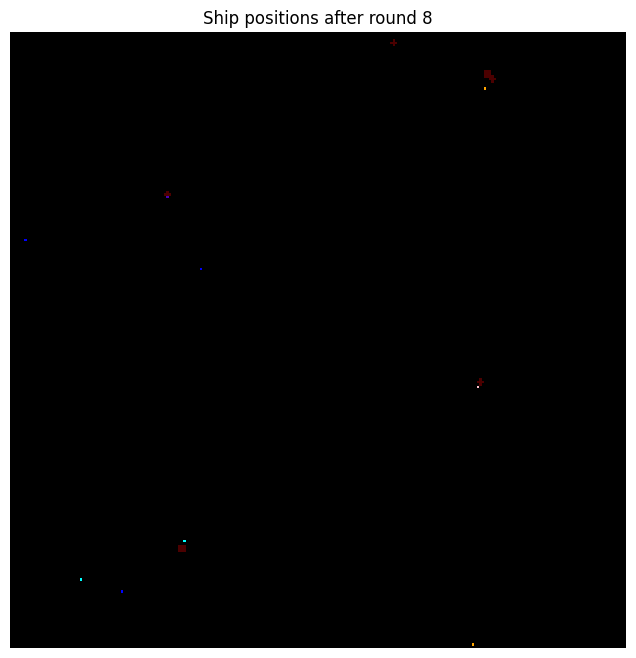


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (193, 251)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (191, 147)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (193, 254)
Ship ID 6 (A medium) has no available weapons and skips attack.
Ship ID 5 (A medium) has no available weapons and skips attack.
Ship ID 3 (A large) is preparing to use sonic missile to attack position (196, 147)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (197, 23) to (196, 24)
Ship ID 12 (B medium) moved from (194, 147) to (196, 146)
Ship ID 10 (B large) moved from (192, 254) to (192, 251)

---- Resolving Player A's Attacks ----
Ship ID 2 attacked position (193, 251), hit enemy ship ID 10 (B large)!
Target ship ID 10 remaining HP: 2
Ship ID 2 remaining hypersonic missiles: 0
Ship ID 1 attacked position (191, 147), but hit nothing.
Ship ID 1 remaining hyp

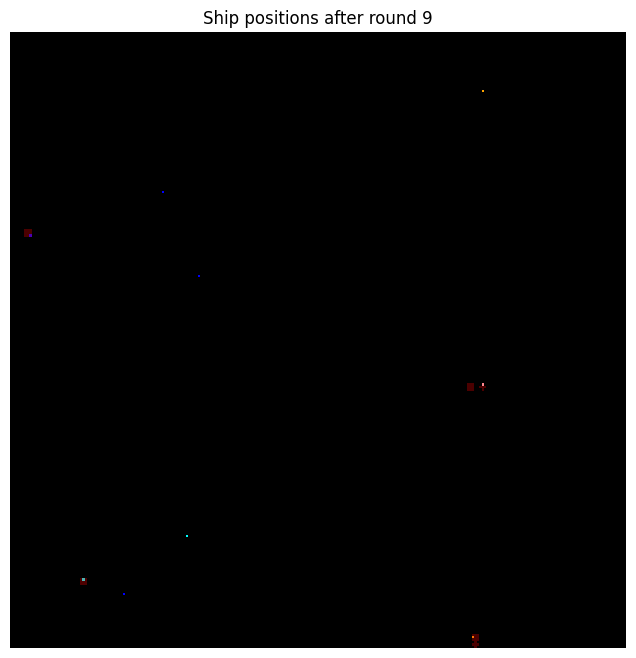


===== Round 10 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) has no available weapons and skips attack.
Ship ID 1 (A large) has no available weapons and skips attack.
Ship ID 4 (A large) has no available weapons and skips attack.
Ship ID 6 (A medium) has no available weapons and skips attack.
Ship ID 5 (A medium) has no available weapons and skips attack.
Ship ID 3 (A large) has no available weapons and skips attack.

---- Player B's Defense ----
Ship ID 11 (B large) moved from (196, 24) to (199, 24)
Ship ID 12 (B medium) moved from (196, 146) to (194, 147)
Ship ID 10 (B large) moved from (192, 251) to (192, 255)

---- Resolving Player A's Attacks ----

---- Player B's Attack ----
Ship ID 11 (B large) has no available weapons and skips attack.
Ship ID 12 (B medium) has no available weapons and skips attack.
Ship ID 10 (B large) has no available weapons and skips attack.

---- Player A's Defense ----
Ship ID 2 (A large) moved from (63, 66) to (64, 66)
Ship ID 1 (A large

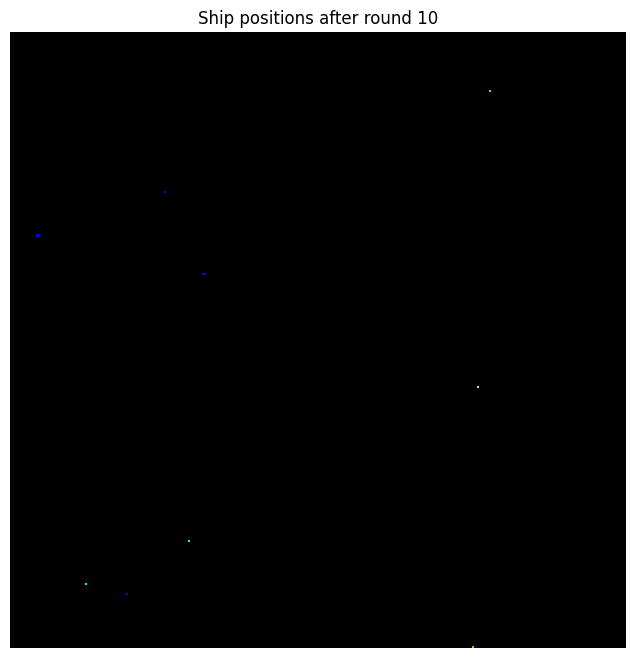

Game over!
Player A remaining ships: 6
Player B remaining ships: 3


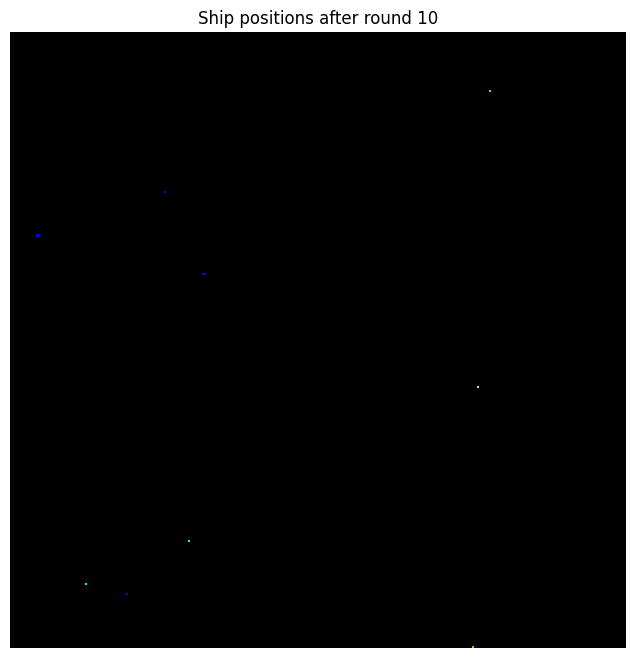


### Aggregated Results After 1000 Simulations ###
Total remaining ships of Player A: 4648
Total remaining ships of Player B: 4186
Average remaining ships of Player A per simulation: 4.65
Average remaining ships of Player B per simulation: 4.19


In [ ]:
# Attack phase function with enhanced weighted strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    attacks = []  # Store attack information

    # Calculate potential attack positions based on enemy current and reachable positions with weighting
    potential_attack_positions = []
    for defender in alive_defenders:
        if defender.ship_type == 'small':
            weight = 5
        elif defender.ship_type == 'medium':
            weight = 3
        else:
            weight = 1
        # Add current position multiple times based on weight
        for _ in range(weight):
            potential_attack_positions.append(defender.position)
        # Add reachable positions multiple times based on weight
        reachable_positions = get_reachable_positions(defender, game_map)
        for pos in reachable_positions:
            for _ in range(weight):
                potential_attack_positions.append(pos)

    if not potential_attack_positions:
        # If no potential positions, fallback to random attack
        if verbose:
            print("No potential attack positions identified. Falling back to random attacks.")
        for ship in alive_attackers:
            available_weapons = ship.available_weapons()
            if not available_weapons:
                if verbose:
                    print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) has no available weapons and skips attack.")
                continue  # No weapons available, skip

            weapon_type = random.choice(available_weapons)
            weapon = Weapon(weapon_type)

            # Random attack position
            attack_x = random.randint(0, game_map.size - 1)
            attack_y = random.randint(0, game_map.size - 1)
            attack_position = (attack_x, attack_y)

            attacks.append({
                'attacker_ship': ship,
                'weapon': weapon,
                'attack_position': attack_position
            })

            # Print attack information
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) is preparing to use {weapon.weapon_type} missile to attack position {attack_position}")
        return attacks, alive_defenders

    # For each attacker ship, select an attack position from potential_attack_positions
    for ship in alive_attackers:
        available_weapons = ship.available_weapons()
        if not available_weapons:
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) has no available weapons and skips attack.")
            continue  # No weapons available, skip

        # Randomly choose a weapon
        weapon_type = random.choice(available_weapons)
        weapon = Weapon(weapon_type)

        # Select an attack position from potential_attack_positions
        attack_position = random.choice(potential_attack_positions)

        attacks.append({
            'attacker_ship': ship,
            'weapon': weapon,
            'attack_position': attack_position
        })

        # Print attack information
        if verbose:
            print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) is preparing to use {weapon.weapon_type} missile to attack position {attack_position}")

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship (ships can choose to stay in the same place)
        move_ship_randomly(ship, game_map, verbose=verbose)

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Move ship randomly function
def move_ship_randomly(ship, game_map, verbose=False):
    attempts = 0
    moved = False
    original_position = ship.position
    while attempts < ship.max_move_attempts:
        dx = random.randint(-ship.move_range, ship.move_range)
        dy = random.randint(-ship.move_range, ship.move_range)
        # Allow staying in the same place (dx == 0 and dy == 0)
        if abs(dx) + abs(dy) > ship.move_range:
            continue  # Exceeds move range, try again
        new_x = ship.position[0] + dx
        new_y = ship.position[1] + dy
        if game_map.is_within_bounds(new_x, new_y) and game_map.grid[new_y][new_x] is None:
            moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
            break  # Successfully moved
        attempts += 1
    if not moved and verbose:
        # Could not find a new position; stay in the same place
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) stays at position ({ship.position[0]}, {ship.position[1]})")

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        if verbose:
            print(f"Game over!")
            print(f"Player A remaining ships: {ships_A_remaining}")
            print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(1000)


### **集火(窮舉)**


### Starting Simulation 1 ###

### Simulation 1 ###
Placed Ship ID 1 (A large) at position (88, 170)
Placed Ship ID 2 (A large) at position (81, 201)
Placed Ship ID 3 (A large) at position (94, 89)
Placed Ship ID 4 (A large) at position (114, 193)
Placed Ship ID 5 (A medium) at position (9, 159)
Placed Ship ID 6 (A medium) at position (74, 102)
Placed Ship ID 7 (A small) at position (62, 57)
Placed Ship ID 8 (A small) at position (106, 1)
Placed Ship ID 9 (B large) at position (138, 50)
Placed Ship ID 10 (B large) at position (217, 148)
Placed Ship ID 11 (B large) at position (229, 35)
Placed Ship ID 12 (B medium) at position (236, 4)
Placed Ship ID 13 (B medium) at position (202, 68)
Placed Ship ID 14 (B medium) at position (194, 125)
Placed Ship ID 15 (B small) at position (226, 17)
Placed Ship ID 16 (B small) at position (132, 13)
Placed Ship ID 17 (B small) at position (182, 100)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hyper

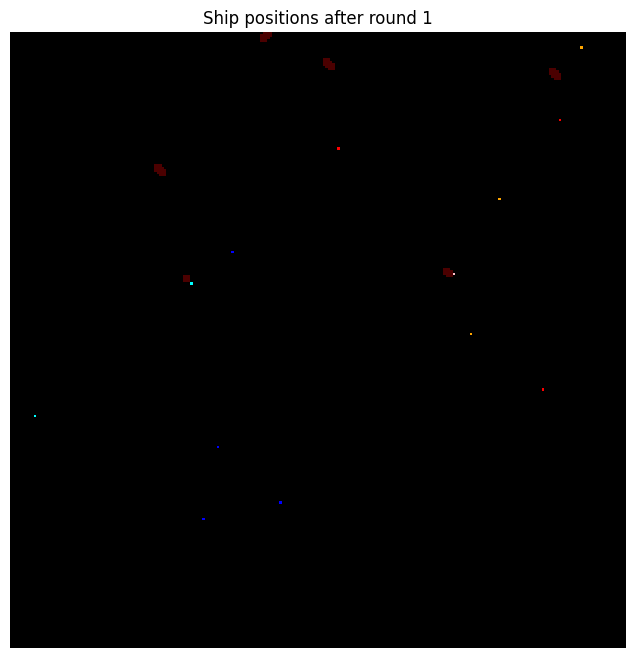


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (184, 100) targeting Ship ID 17 (B small)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (183, 99) targeting Ship ID 17 (B small)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (185, 101) targeting Ship ID 17 (B small)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (236, 6) targeting Ship ID 12 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (239, 6) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (237, 3) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 12 (B medium) moved from (237, 6) to (236, 7)
Ship ID 11 (B large) moved from (228, 36) to (232, 36)
Ship ID 9 (B large) moved from (136, 48) to (136, 49)
Ship ID 13 (B medium) moved from

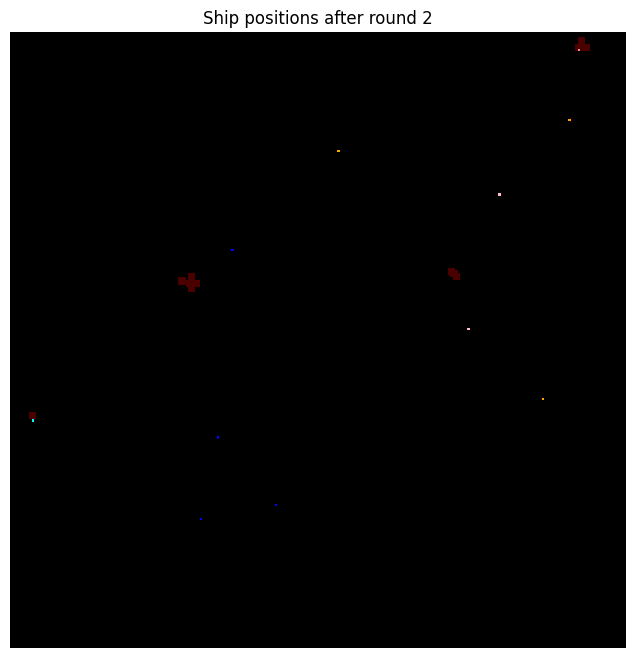


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (235, 7) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (238, 7) targeting Ship ID 12 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (236, 5) targeting Ship ID 12 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (236, 9) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (232, 6) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 12 (B medium) moved from (236, 7) to (237, 9)
Ship ID 11 (B large) moved from (232, 36) to (229, 35)
Ship ID 9 (B large) moved from (136, 49) to (140, 49)
Ship ID 13 (B medium) moved from (203, 67) to (204, 67)
Ship ID 14 (B medium) moved from (190, 123) to (188, 123)
Ship ID 10 (B large) moved from (221, 152) to

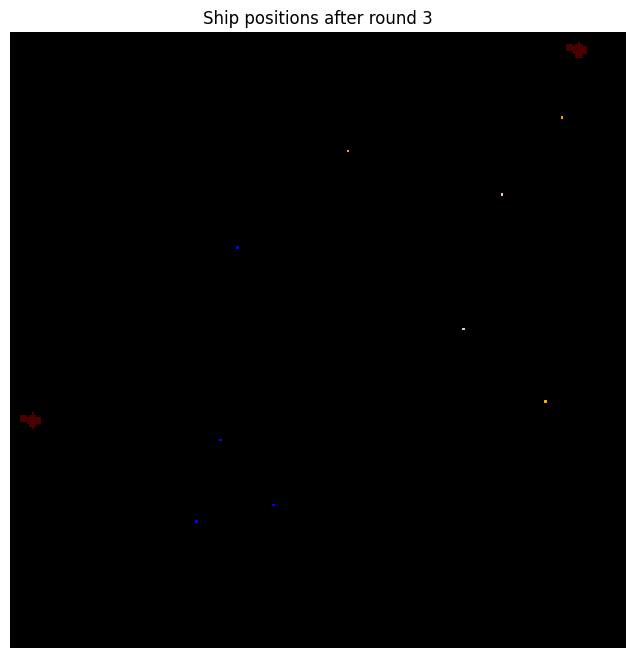


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (203, 67) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (206, 67) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (204, 64) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (204, 69) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (229, 35) to (228, 38)
Ship ID 9 (B large) moved from (140, 49) to (139, 51)
Ship ID 13 (B medium) moved from (204, 67) to (204, 70)
Ship ID 14 (B medium) moved from (188, 123) to (189, 122)
Ship ID 10 (B large) moved from (222, 153) to (220, 155)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (203, 67), but hit nothing.
Ship ID 3 remaining hypersonic missiles: 0
Ship ID 1 atta

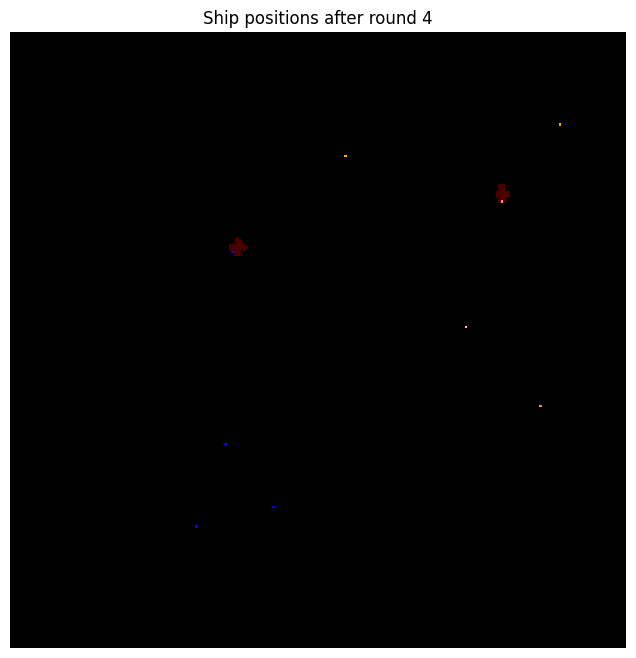


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use sonic missile to attack position (202, 70) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (204, 68) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (204, 71) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (206, 70) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (228, 38) to (225, 39)
Ship ID 9 (B large) moved from (139, 51) to (138, 52)
Ship ID 13 (B medium) moved from (204, 70) to (204, 73)
Ship ID 14 (B medium) moved from (189, 122) to (188, 121)
Ship ID 10 (B large) moved from (220, 155) to (221, 153)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (202, 70), but hit nothing.
Ship ID 3 remaining sonic missiles: 4
Ship ID 1 attacked position (204, 68), 

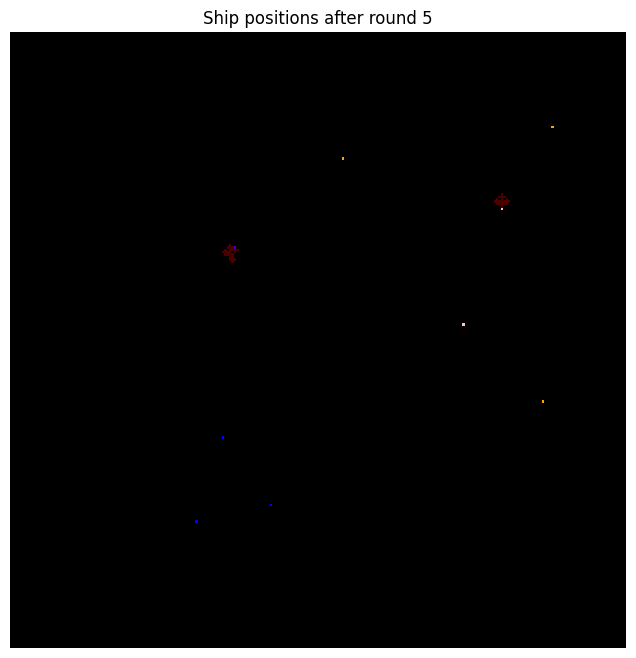


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use sonic missile to attack position (202, 73) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (204, 71) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (204, 74) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (206, 73) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (225, 39) to (227, 39)
Ship ID 9 (B large) moved from (138, 52) to (138, 55)
Ship ID 13 (B medium) moved from (204, 73) to (203, 73)
Ship ID 14 (B medium) moved from (188, 121) to (187, 122)
Ship ID 10 (B large) moved from (221, 153) to (219, 153)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (202, 73), hit enemy ship ID 13 (B medium)!
Target ship ID 13 remaining HP: 0
Ship ID 13 (B medium) remov

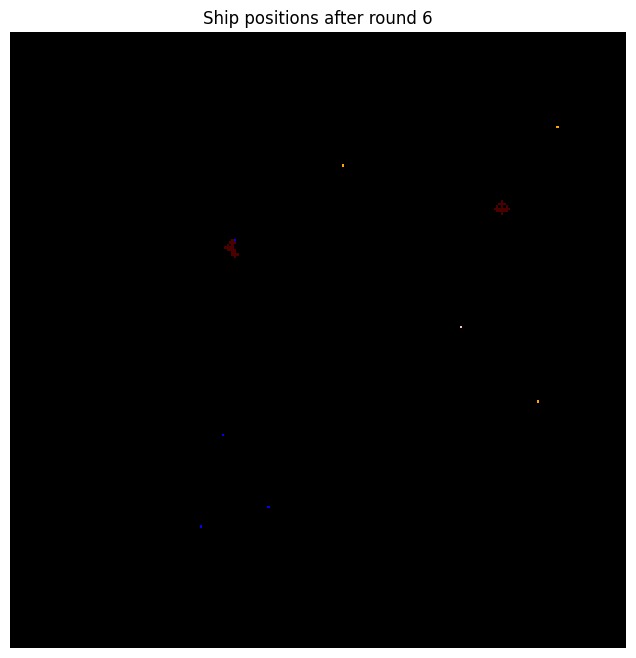


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use sonic missile to attack position (185, 122) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (187, 120) targeting Ship ID 14 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (187, 123) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (189, 122) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (227, 39) to (231, 39)
Ship ID 9 (B large) moved from (138, 55) to (141, 54)
Ship ID 14 (B medium) moved from (187, 122) to (184, 122)
Ship ID 10 (B large) moved from (219, 153) to (221, 151)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (185, 122), hit enemy ship ID 14 (B medium)!
Target ship ID 14 remaining HP: 1
Ship ID 3 remaining sonic missiles: 2
Ship ID 1 attacked position (187, 120), 

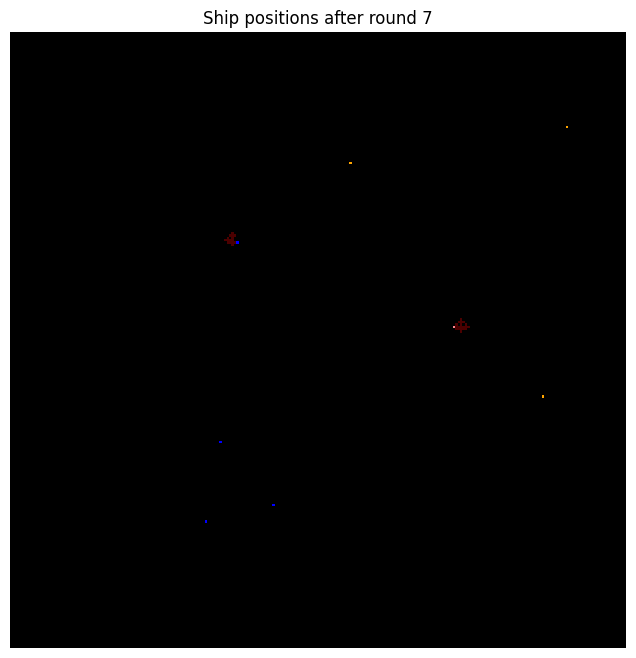


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use sonic missile to attack position (182, 122) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (184, 120) targeting Ship ID 14 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (184, 123) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (186, 122) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (231, 39) to (231, 37)
Ship ID 9 (B large) moved from (141, 54) to (141, 51)
Ship ID 14 (B medium) moved from (184, 122) to (184, 124)
Ship ID 10 (B large) moved from (221, 151) to (221, 152)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (182, 122), but hit nothing.
Ship ID 3 remaining sonic missiles: 1
Ship ID 1 attacked position (184, 120), but hit nothing.
Ship ID 1 remaining sonic missile

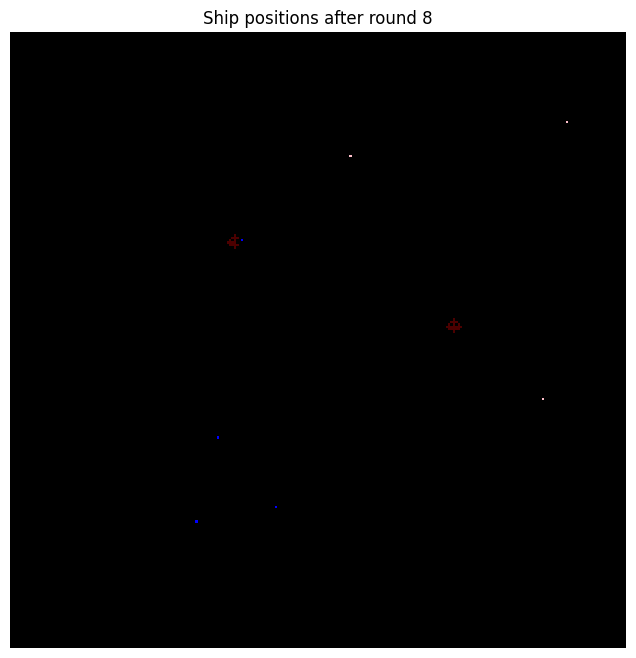


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 3 (A large) is preparing to use sonic missile to attack position (228, 37) targeting Ship ID 11 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (230, 35) targeting Ship ID 11 (B large)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (230, 38) targeting Ship ID 11 (B large)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (231, 40) targeting Ship ID 11 (B large)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (231, 37) to (229, 39)
Ship ID 9 (B large) moved from (141, 51) to (141, 49)
Ship ID 10 (B large) moved from (221, 152) to (219, 151)

---- Resolving Player A's Attacks ----
Ship ID 3 attacked position (228, 37), but hit nothing.
Ship ID 3 remaining sonic missiles: 0
Ship ID 1 attacked position (230, 35), but hit nothing.
Ship ID 1 remaining sonic missiles: 0
Ship ID 4 attacked position (230, 38), but hit nothing.
Ship ID

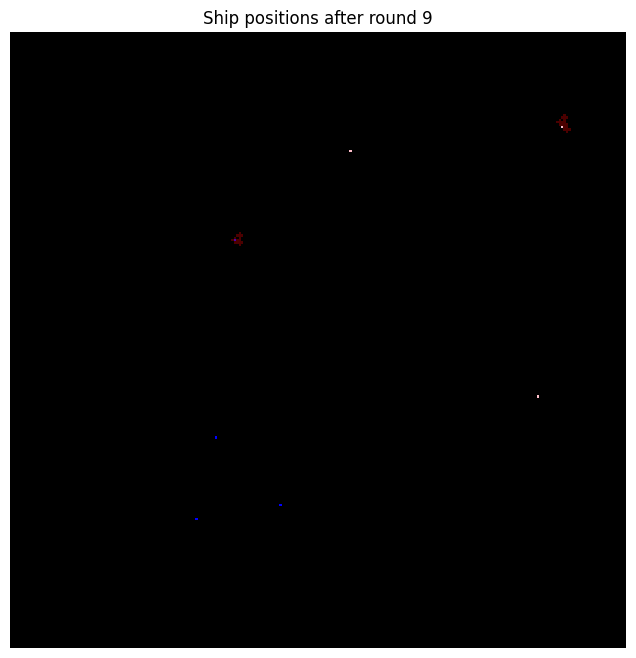


===== Round 10 begins =====

---- Player A's Attack ----

---- Player B's Defense ----
Ship ID 11 (B large) moved from (229, 39) to (230, 39)
Ship ID 9 (B large) moved from (141, 49) to (140, 47)
Ship ID 10 (B large) moved from (219, 151) to (216, 151)

---- Resolving Player A's Attacks ----

---- Player B's Attack ----

---- Player A's Defense ----
Ship ID 3 (A large) moved from (93, 86) to (93, 88)
Ship ID 1 (A large) moved from (85, 168) to (83, 169)
Ship ID 4 (A large) moved from (112, 196) to (112, 193)
Ship ID 2 (A large) moved from (77, 202) to (77, 205)

---- Resolving Player B's Attacks ----


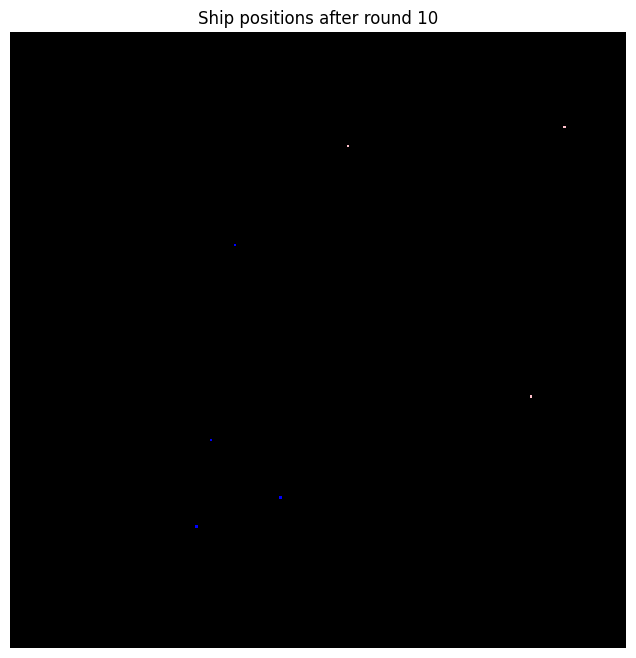

Game over!
Player A remaining ships: 4
Player B remaining ships: 3


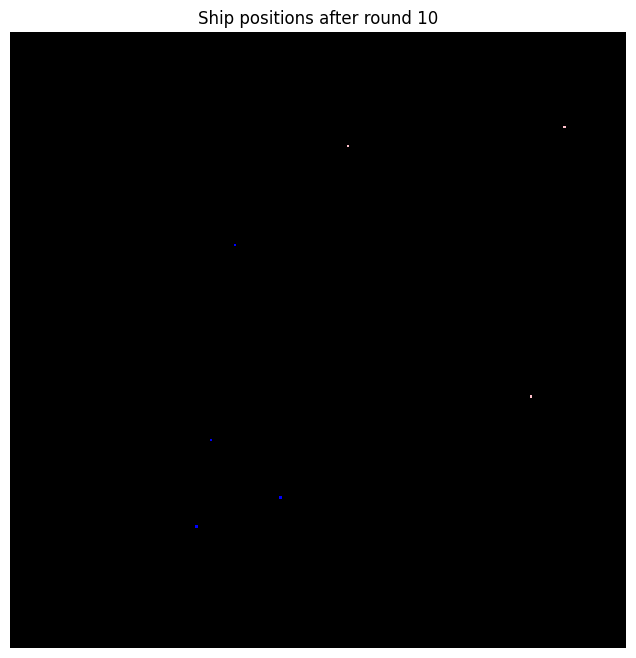


### Starting Simulation 2 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 3 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 4 ###
Game over!
Player A remaining ships: 3
Player B remaining ships: 3

### Starting Simulation 5 ###
Game over!
Player A remaining ships: 3
Player B remaining ships: 3

### Starting Simulation 6 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 7 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 8 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 9 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 10 ###
Game over!
Player A remaining ships: 4
Player B remaining ships: 3

### Starting Simulation 11 ###
Game over!
Player A remaining ships: 3
Player B remaining ships: 3

### Starting Simu

In [ ]:
# Attack phase function with focused fire strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    # Sort defenders by priority: small > medium > large
    priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_defenders_sorted = sorted(alive_defenders, key=lambda x: priority_order[x.ship_type])

    attacks = []  # Store attack information

    # Keep track of which attackers have already attacked this turn
    attackers_available = alive_attackers.copy()

    for target_ship in alive_defenders_sorted:
        if not attackers_available:
            break  # No more attackers available

        # Calculate target's reachable positions (current and next turn)
        target_reachable_positions = get_reachable_positions(target_ship, game_map)

        # Define positions that need to be covered
        positions_to_cover = set(target_reachable_positions)

        # List to hold attacks for this target
        target_attacks = []

        while positions_to_cover and attackers_available:
            best_attacker = None
            best_weapon = None
            best_attack_position = None
            best_coverage = 0

            # Iterate through available attackers to find the best attack
            for attacker in attackers_available:
                available_weapons = attacker.available_weapons()
                if not available_weapons:
                    continue  # This attacker has no available weapons

                # Prioritize hypersonic over sonic for larger coverage
                if 'hypersonic' in available_weapons:
                    weapon_type = 'hypersonic'
                else:
                    weapon_type = 'sonic'

                weapon = Weapon(weapon_type)

                # Iterate through all possible attack positions to find the best coverage
                for x in range(game_map.size):
                    for y in range(game_map.size):
                        covered = set()
                        for dx, dy in weapon.attack_pattern:
                            pos = (x + dx, y + dy)
                            if pos in positions_to_cover and game_map.is_within_bounds(*pos):
                                covered.add(pos)
                        coverage = len(covered)
                        if coverage > best_coverage:
                            best_coverage = coverage
                            best_attacker = attacker
                            best_weapon = weapon
                            best_attack_position = (x, y)

            if best_attacker and best_weapon and best_attack_position:
                # Assign the attack
                attacks.append({
                    'attacker_ship': best_attacker,
                    'weapon': best_weapon,
                    'attack_position': best_attack_position
                })
                target_attacks.append(best_attacker)
                # Remove covered positions
                for dx, dy in best_weapon.attack_pattern:
                    pos = (best_attack_position[0] + dx, best_attack_position[1] + dy)
                    if pos in positions_to_cover:
                        positions_to_cover.remove(pos)
                # Remove the attacker from available attackers
                attackers_available.remove(best_attacker)
                if verbose:
                    print(f"Ship ID {best_attacker.ship_id} ({best_attacker.owner} {best_attacker.ship_type}) is preparing to use {best_weapon.weapon_type} missile to attack position {best_attack_position} targeting Ship ID {target_ship.ship_id} ({target_ship.owner} {target_ship.ship_type})")
            else:
                # No suitable attacker found to cover remaining positions
                break

        # After assigning attacks to cover the target's range, check if target is already sunk
        # Actual damage will be applied in resolve_attacks
        # If the target is sunk, continue to the next target
        # Otherwise, it remains and might be targeted again if attackers are available

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship (ships can choose to stay in the same place)
        move_ship_randomly(ship, game_map, verbose=verbose)

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Move ship randomly function
def move_ship_randomly(ship, game_map, verbose=False):
    attempts = 0
    moved = False
    original_position = ship.position
    while attempts < ship.max_move_attempts:
        dx = random.randint(-ship.move_range, ship.move_range)
        dy = random.randint(-ship.move_range, ship.move_range)
        # Allow staying in the same place (dx == 0 and dy == 0)
        if abs(dx) + abs(dy) > ship.move_range:
            continue  # Exceeds move range, try again
        new_x = ship.position[0] + dx
        new_y = ship.position[1] + dy
        if game_map.is_within_bounds(new_x, new_y) and game_map.grid[new_y][new_x] is None:
            moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
            break  # Successfully moved
        attempts += 1
    if not moved and verbose:
        # Could not find a new position; stay in the same place
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) stays at position ({ship.position[0]}, {ship.position[1]})")

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        print(f"Game over!")
        print(f"Player A remaining ships: {ships_A_remaining}")
        print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        print(f"\n### Starting Simulation {simulation} ###")
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(100)


### **集火(greedy)**


### Simulation 1 ###
Placed Ship ID 1 (A large) at position (108, 199)
Placed Ship ID 2 (A large) at position (70, 85)
Placed Ship ID 3 (A large) at position (75, 142)
Placed Ship ID 4 (A large) at position (109, 11)
Placed Ship ID 5 (A medium) at position (68, 141)
Placed Ship ID 6 (A medium) at position (14, 219)
Placed Ship ID 7 (A small) at position (19, 43)
Placed Ship ID 8 (A small) at position (112, 187)
Placed Ship ID 9 (B large) at position (183, 93)
Placed Ship ID 10 (B large) at position (159, 125)
Placed Ship ID 11 (B large) at position (149, 46)
Placed Ship ID 12 (B medium) at position (133, 190)
Placed Ship ID 13 (B medium) at position (216, 165)
Placed Ship ID 14 (B medium) at position (226, 253)
Placed Ship ID 15 (B small) at position (193, 66)
Placed Ship ID 16 (B small) at position (143, 104)
Placed Ship ID 17 (B small) at position (157, 133)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 7 (A small) is preparing to use hypersonic missile to attack 

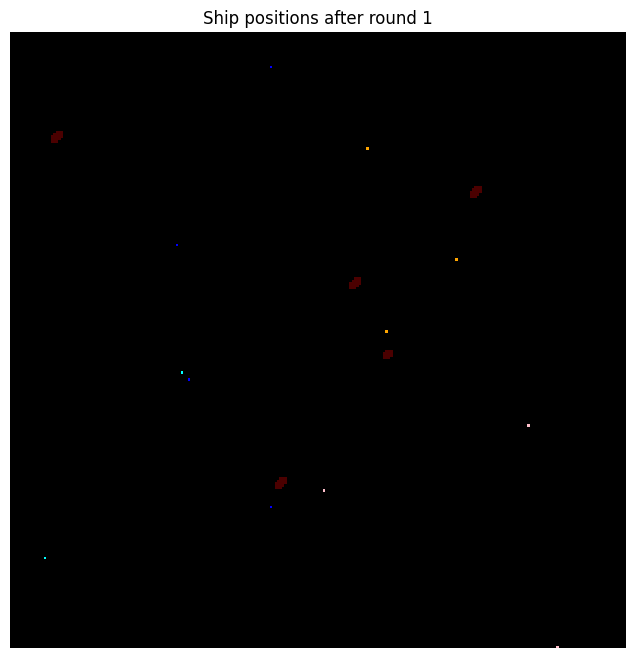


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (216, 163) targeting Ship ID 13 (B medium)
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (213, 163) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (215, 165) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (215, 160) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (217, 162) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (129, 190) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (148, 48) to (148, 49)
Ship ID 9 (B large) moved from (185, 94) to (187, 96)
Ship ID 10 (B large) moved from (156, 124) to (153, 123)
Ship ID 13 (B mediu

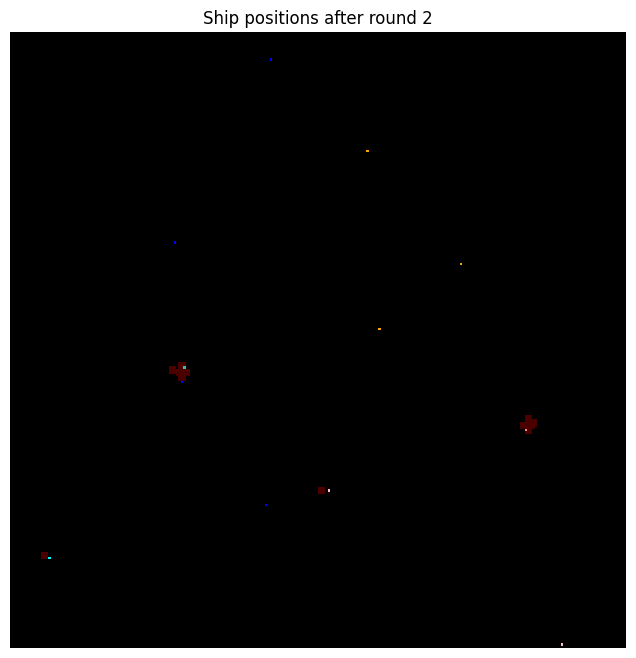


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (213, 165) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (216, 165) targeting Ship ID 13 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (214, 163) targeting Ship ID 13 (B medium)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (214, 167) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (210, 164) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (132, 189) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (148, 49) to (150, 48)
Ship ID 9 (B large) moved from (187, 96) to (186, 96)
Ship ID 10 (B large) moved from (153, 123) to (151, 125)
Ship ID 13 (B medium) moved f

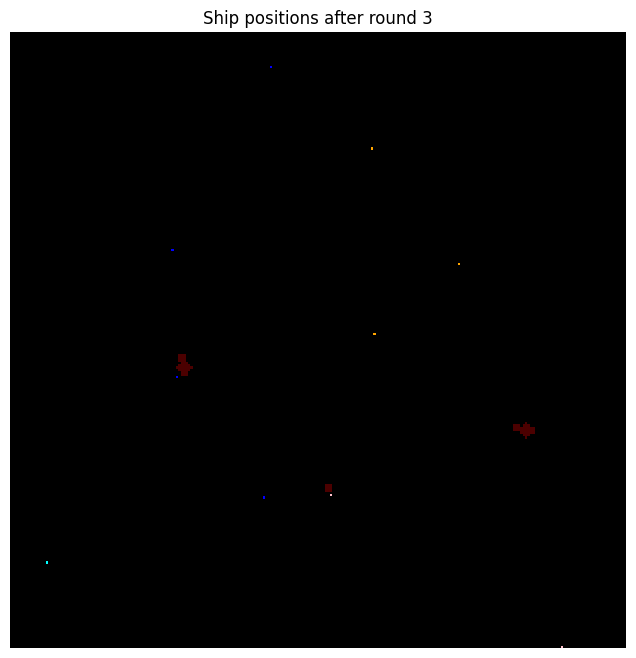


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (133, 191) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (133, 194) targeting Ship ID 12 (B medium)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (131, 192) targeting Ship ID 12 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (135, 192) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (132, 188) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (150, 48) to (147, 47)
Ship ID 9 (B large) moved from (186, 96) to (189, 97)
Ship ID 10 (B large) moved from (151, 125) to (152, 123)
Ship ID 12 (B medium) moved from (133, 192) to (132, 190)
Ship ID 14 (B medium) moved from (229, 255) to (228, 254)

---- Resolving Player A's Att

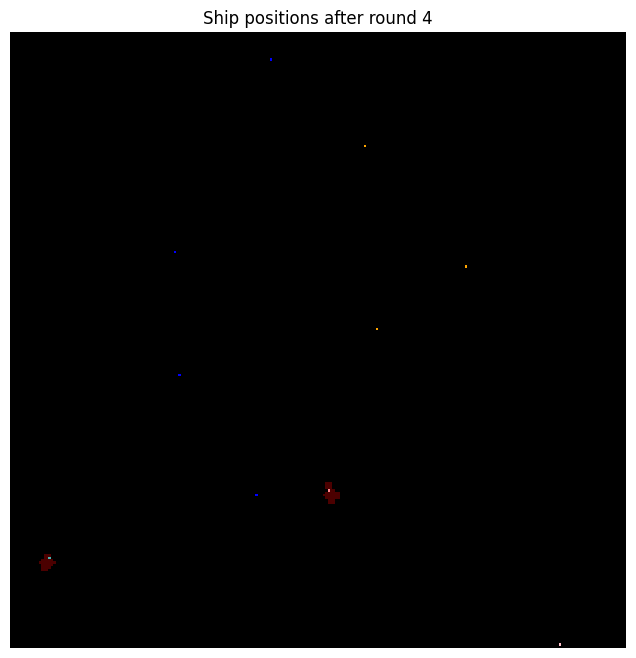


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (132, 189) targeting Ship ID 12 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (130, 190) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (134, 190) targeting Ship ID 12 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (132, 192) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (132, 188) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (147, 47) to (147, 48)
Ship ID 9 (B large) moved from (189, 97) to (191, 99)
Ship ID 10 (B large) moved from (152, 123) to (150, 123)
Ship ID 12 (B medium) moved from (132, 190) to (131, 189)
Ship ID 14 (B medium) moved from (228, 254) to (227, 254)

---- Resolving Player A's Attacks ----
Ship ID 6 

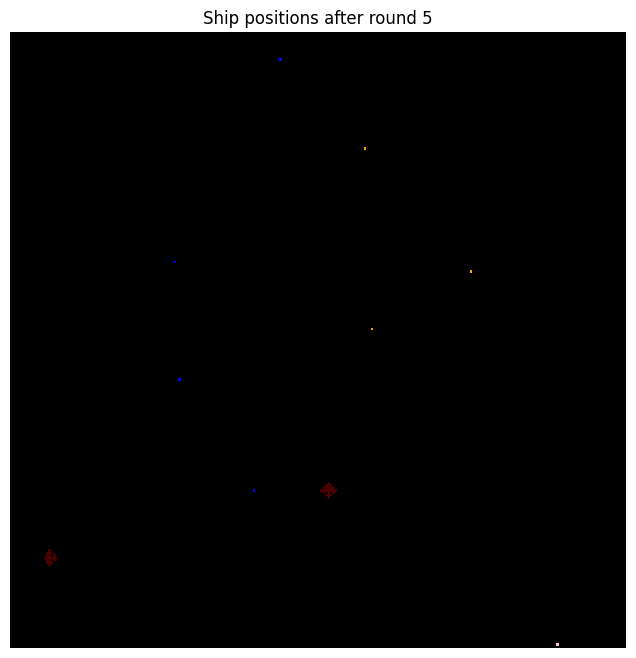


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (225, 254) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (227, 252) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (229, 254) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (227, 255) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (147, 48) to (147, 47)
Ship ID 9 (B large) moved from (191, 99) to (189, 97)
Ship ID 10 (B large) moved from (150, 123) to (147, 124)
Ship ID 14 (B medium) moved from (227, 254) to (228, 252)

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (225, 254), but hit nothing.
Ship ID 4 remaining sonic missiles: 3
Ship ID 2 attacked position (227, 252), hit enemy ship ID 14 (B medium)!
Target ship ID 14

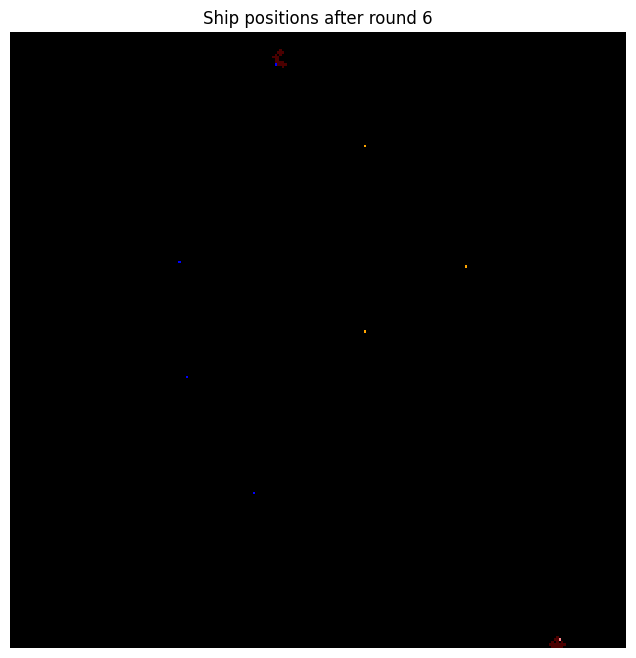


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (228, 250) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (226, 252) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (230, 252) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (228, 254) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (147, 47) to (147, 45)
Ship ID 9 (B large) moved from (189, 97) to (186, 98)
Ship ID 10 (B large) moved from (147, 124) to (148, 126)
Ship ID 14 (B medium) moved from (228, 252) to (230, 252)

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (228, 250), but hit nothing.
Ship ID 4 remaining sonic missiles: 2
Ship ID 2 attacked position (226, 252), but hit nothing.
Ship ID 2 remaining sonic missile

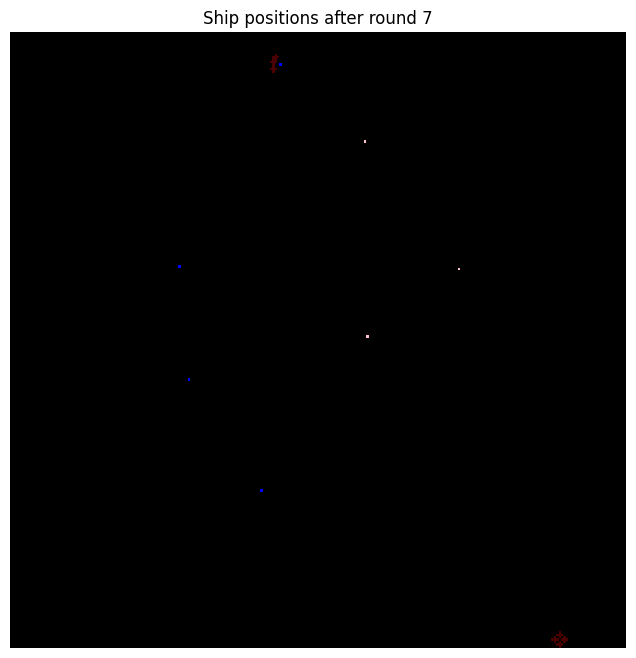


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (148, 43) targeting Ship ID 11 (B large)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (148, 46) targeting Ship ID 11 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (145, 44) targeting Ship ID 11 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (146, 47) targeting Ship ID 11 (B large)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (147, 45) to (147, 41)
Ship ID 9 (B large) moved from (186, 98) to (188, 100)
Ship ID 10 (B large) moved from (148, 126) to (146, 128)

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (148, 43), but hit nothing.
Ship ID 4 remaining sonic missiles: 1
Ship ID 2 attacked position (148, 46), but hit nothing.
Ship ID 2 remaining sonic missiles: 1
Ship ID 3 attacked position (145, 44), but hit nothing.
Ship I

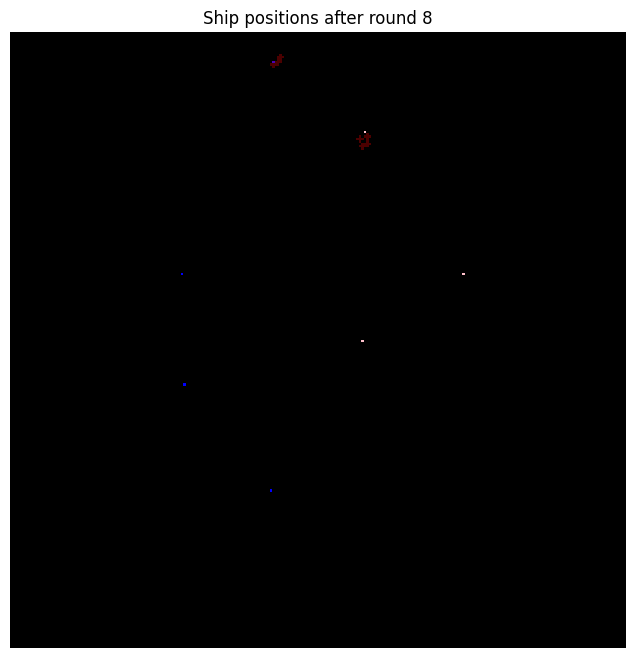


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (148, 43) targeting Ship ID 11 (B large)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (146, 40) targeting Ship ID 11 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (147, 38) targeting Ship ID 11 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (145, 42) targeting Ship ID 11 (B large)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (147, 41) to (146, 40)
Ship ID 9 (B large) moved from (188, 100) to (187, 99)
Ship ID 10 (B large) moved from (146, 128) to (149, 128)

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (148, 43), but hit nothing.
Ship ID 4 remaining sonic missiles: 0
Ship ID 2 attacked position (146, 40), hit enemy ship ID 11 (B large)!
Target ship ID 11 remaining HP: 2
Ship ID 2 remaining sonic missiles: 0
Ship ID 3 att

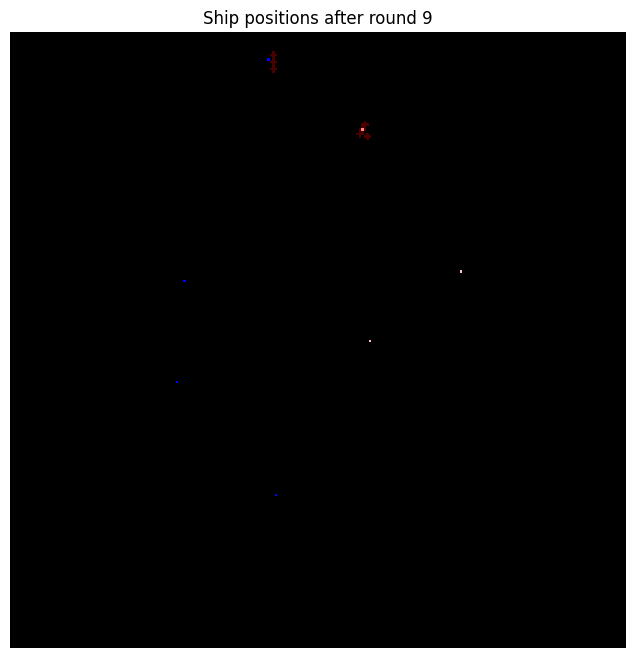


===== Round 10 begins =====

---- Player A's Attack ----

---- Player B's Defense ----
Ship ID 11 (B large) moved from (146, 40) to (147, 41)
Ship ID 9 (B large) moved from (187, 99) to (186, 98)
Ship ID 10 (B large) moved from (149, 128) to (151, 126)

---- Resolving Player A's Attacks ----

---- Player B's Attack ----

---- Player A's Defense ----
Ship ID 4 (A large) moved from (107, 11) to (109, 11)
Ship ID 2 (A large) moved from (72, 103) to (70, 103)
Ship ID 3 (A large) moved from (69, 145) to (66, 145)
Ship ID 1 (A large) moved from (110, 192) to (110, 195)

---- Resolving Player B's Attacks ----


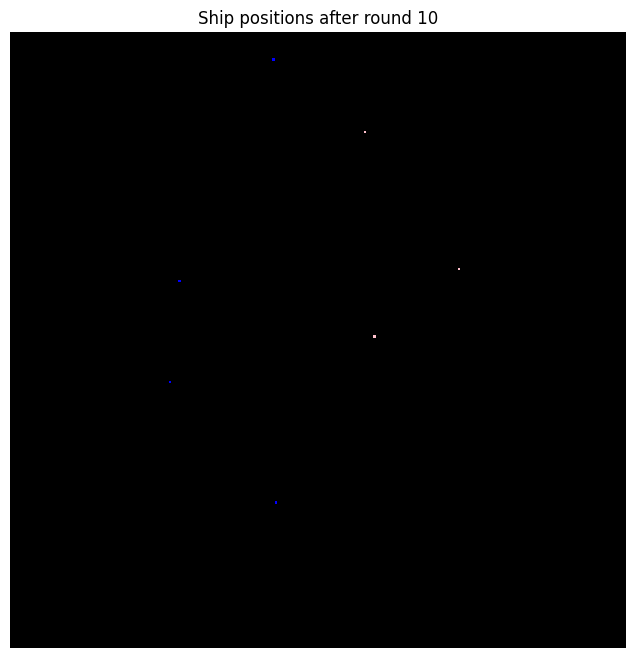

Game over!
Player A remaining ships: 4
Player B remaining ships: 3


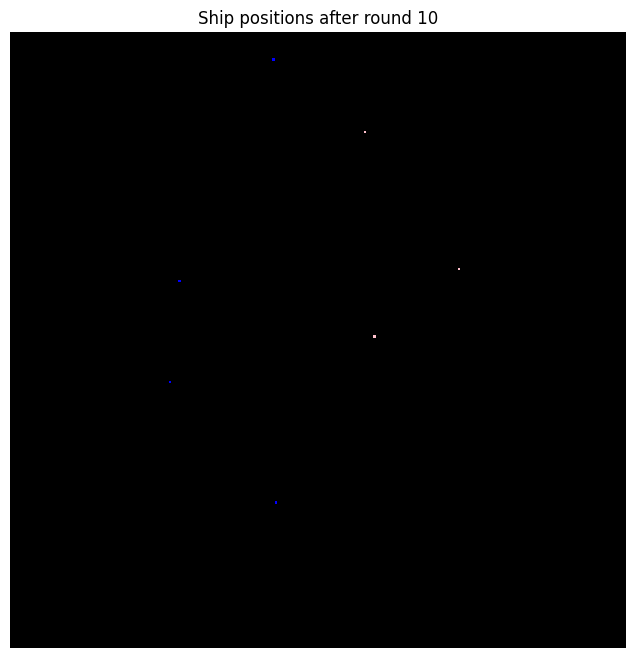


### Aggregated Results After 1000 Simulations ###
Total remaining ships of Player A: 3750
Total remaining ships of Player B: 2955
Average remaining ships of Player A per simulation: 3.75
Average remaining ships of Player B per simulation: 2.96


In [ ]:
# Attack phase function with greedy focused fire strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    # Sort defenders by priority: small > medium > large
    priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_defenders_sorted = sorted(alive_defenders, key=lambda x: priority_order[x.ship_type])

    # Sort attackers by priority: small > medium > large
    attackers_priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_attackers_sorted = sorted(alive_attackers, key=lambda x: attackers_priority_order[x.ship_type])

    attacks = []  # Store attack information

    # Keep track of which attackers have already attacked this turn
    attackers_available = alive_attackers_sorted.copy()

    for target_ship in alive_defenders_sorted:
        if not attackers_available:
            break  # No more attackers available

        # Calculate target's reachable positions (current and next turn)
        target_reachable_positions = get_reachable_positions(target_ship, game_map)

        # Define positions that need to be covered
        positions_to_cover = set(target_reachable_positions)

        while positions_to_cover and attackers_available:
            best_attacker = None
            best_weapon = None
            best_attack_position = None
            best_coverage = 0

            # Iterate through available attackers to find the best attack
            for attacker in attackers_available:
                available_weapons = attacker.available_weapons()
                if not available_weapons:
                    continue  # This attacker has no available weapons

                # Prioritize hypersonic over sonic for larger coverage
                if 'hypersonic' in available_weapons:
                    weapon_type = 'hypersonic'
                else:
                    weapon_type = 'sonic'

                weapon = Weapon(weapon_type)

                # Iterate through target's reachable positions to find attack positions
                for pos in positions_to_cover:
                    x, y = pos
                    # Potential attack position is the position itself
                    # Alternatively, attacker can attack surrounding positions to cover multiple targets
                    # Here, we choose to attack positions that can cover multiple target positions

                    # Find possible attack positions that can cover this target position
                    # For hypersonic: any position within 1 unit distance
                    # For sonic: the target position itself or adjacent

                    # Calculate all possible attack positions that can cover the current target position
                    for dx, dy in weapon.attack_pattern:
                        attack_x = x + dx
                        attack_y = y + dy
                        if game_map.is_within_bounds(attack_x, attack_y):
                            covered = set()
                            for ddx, ddy in weapon.attack_pattern:
                                covered_pos = (attack_x + ddx, attack_y + ddy)
                                if covered_pos in positions_to_cover and game_map.is_within_bounds(*covered_pos):
                                    covered.add(covered_pos)
                            coverage = len(covered)
                            if coverage > best_coverage:
                                best_coverage = coverage
                                best_attacker = attacker
                                best_weapon = weapon
                                best_attack_position = (attack_x, attack_y)

            if best_attacker and best_weapon and best_attack_position:
                # Assign the attack
                attacks.append({
                    'attacker_ship': best_attacker,
                    'weapon': best_weapon,
                    'attack_position': best_attack_position
                })

                if verbose:
                    print(f"Ship ID {best_attacker.ship_id} ({best_attacker.owner} {best_attacker.ship_type}) is preparing to use {best_weapon.weapon_type} missile to attack position {best_attack_position} targeting Ship ID {target_ship.ship_id} ({target_ship.owner} {target_ship.ship_type})")

                # Remove the covered positions
                for dx, dy in best_weapon.attack_pattern:
                    pos = (best_attack_position[0] + dx, best_attack_position[1] + dy)
                    if pos in positions_to_cover:
                        positions_to_cover.remove(pos)

                # Remove the attacker from available attackers
                attackers_available.remove(best_attacker)
            else:
                # No suitable attacker found to cover remaining positions
                break

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship (ships can choose to stay in the same place)
        move_ship_randomly(ship, game_map, verbose=verbose)

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Move ship randomly function
def move_ship_randomly(ship, game_map, verbose=False):
    attempts = 0
    moved = False
    original_position = ship.position
    while attempts < ship.max_move_attempts:
        dx = random.randint(-ship.move_range, ship.move_range)
        dy = random.randint(-ship.move_range, ship.move_range)
        # Allow staying in the same place (dx == 0 and dy == 0)
        if abs(dx) + abs(dy) > ship.move_range:
            continue  # Exceeds move range, try again
        new_x = ship.position[0] + dx
        new_y = ship.position[1] + dy
        if game_map.is_within_bounds(new_x, new_y) and game_map.grid[new_y][new_x] is None:
            moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
            break  # Successfully moved
        attempts += 1
    if not moved and verbose:
        # Could not find a new position; stay in the same place
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) stays at position ({ship.position[0]}, {ship.position[1]})")

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        if verbose:
            print(f"Game over!")
            print(f"Player A remaining ships: {ships_A_remaining}")
            print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(1000)


### **閃避距離最大**


### Simulation 1 ###
Placed Ship ID 1 (A large) at position (51, 84)
Placed Ship ID 2 (A large) at position (0, 147)
Placed Ship ID 3 (A large) at position (105, 50)
Placed Ship ID 4 (A large) at position (43, 15)
Placed Ship ID 5 (A medium) at position (16, 248)
Placed Ship ID 6 (A medium) at position (123, 103)
Placed Ship ID 7 (A small) at position (35, 228)
Placed Ship ID 8 (A small) at position (100, 227)
Placed Ship ID 9 (B large) at position (174, 237)
Placed Ship ID 10 (B large) at position (156, 191)
Placed Ship ID 11 (B large) at position (152, 217)
Placed Ship ID 12 (B medium) at position (207, 5)
Placed Ship ID 13 (B medium) at position (199, 89)
Placed Ship ID 14 (B medium) at position (183, 233)
Placed Ship ID 15 (B small) at position (189, 4)
Placed Ship ID 16 (B small) at position (247, 212)
Placed Ship ID 17 (B small) at position (158, 40)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hypersonic missile to attack posi

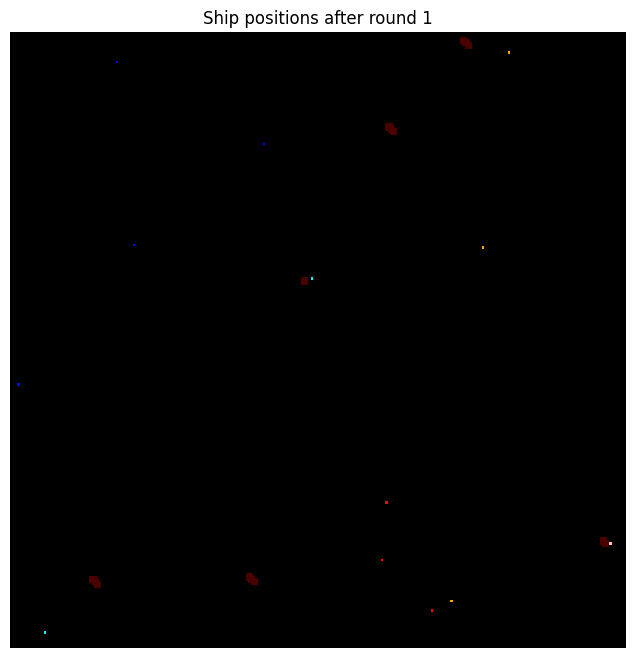


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (249, 212) targeting Ship ID 16 (B small)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (248, 211) targeting Ship ID 16 (B small)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (250, 213) targeting Ship ID 16 (B small)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (207, 7) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (207, 10) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (209, 8) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 12 (B medium) moved from (207, 8) to (206, 6)
Ship ID 12 (B medium) moved to (206, 6) as far as possible.
Ship ID 13 (B medium) moved from (196, 89) to (195, 87)
Ship ID 13 (B medium) m

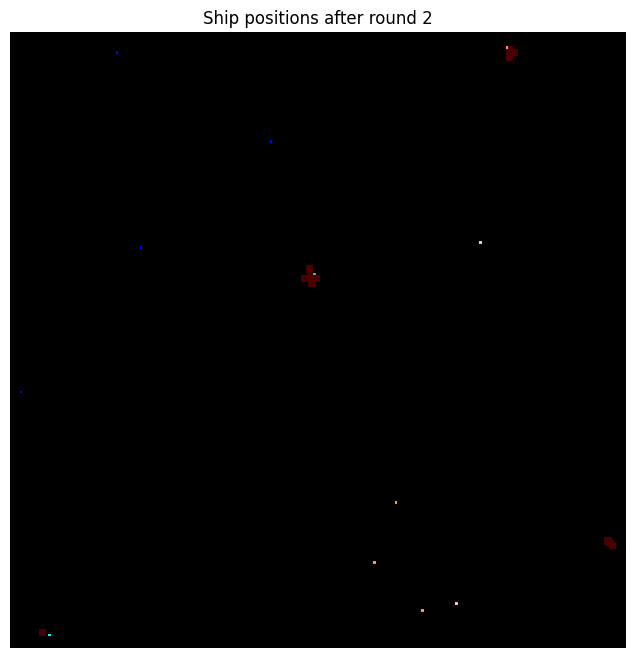


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (206, 7) targeting Ship ID 12 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (206, 4) targeting Ship ID 12 (B medium)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (208, 6) targeting Ship ID 12 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (204, 6) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (205, 8) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (194, 87) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 12 (B medium) moved from (206, 6) to (206, 9)
Ship ID 12 (B medium) moved to (206, 9) as far as possible.
Ship ID 13 (B medium) moved from (195, 87) to (192, 87)
Ship ID 13 (B medium) moved to (192,

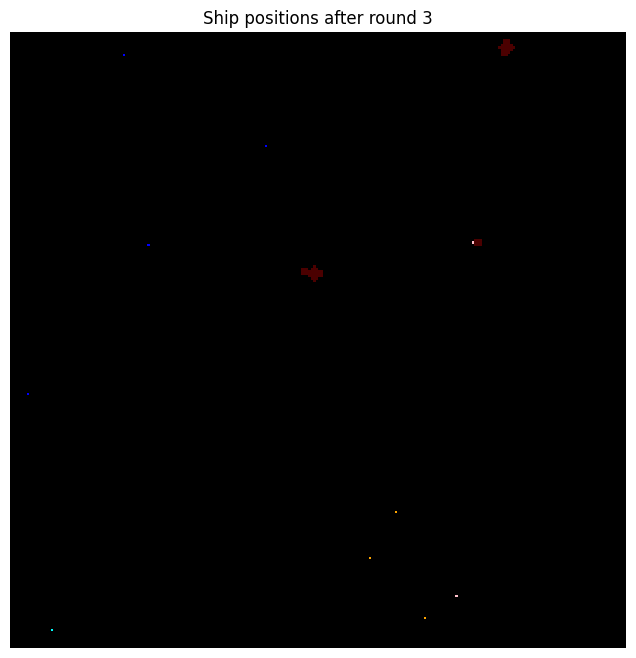


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (191, 87) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (194, 87) targeting Ship ID 13 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (192, 85) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (192, 89) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (188, 86) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 13 (B medium) moved from (192, 87) to (191, 89)
Ship ID 13 (B medium) moved to (191, 89) as far as possible.
Ship ID 10 (B large) moved from (160, 199) to (161, 196)
Ship ID 10 (B large) moved to (161, 196) as far as possible.
Ship ID 11 (B large) moved from (149, 218) to (147, 220)
Ship ID 11 (B large) move

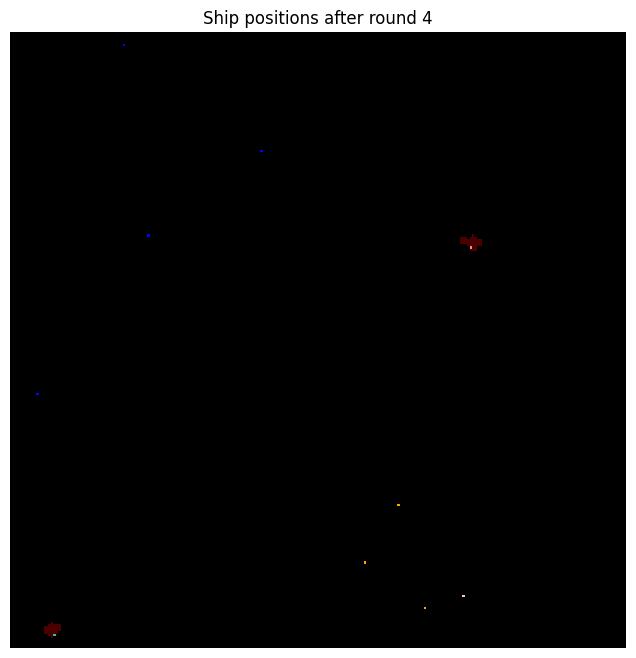


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (190, 88) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (191, 91) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (193, 89) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (191, 87) targeting Ship ID 13 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (192, 89) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 13 (B medium) moved from (191, 89) to (194, 89)
Ship ID 13 (B medium) moved to (194, 89) as far as possible.
Ship ID 10 (B large) moved from (161, 196) to (158, 197)
Ship ID 10 (B large) moved to (158, 197) as far as possible.
Ship ID 11 (B large) moved from (147, 220) to (149, 218)
Ship ID 11 (B large) moved to (149, 218) as f

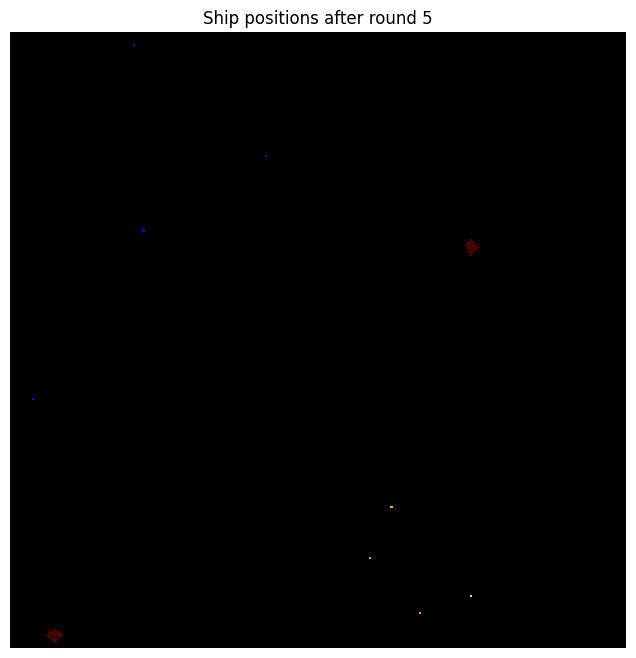


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (191, 234) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (191, 232) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (191, 236) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (193, 234) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 10 (B large) moved from (158, 197) to (159, 194)
Ship ID 10 (B large) moved to (159, 194) as far as possible.
Ship ID 11 (B large) moved from (149, 218) to (153, 218)
Ship ID 11 (B large) moved to (153, 218) as far as possible.
Ship ID 14 (B medium) moved from (191, 234) to (190, 232)
Ship ID 14 (B medium) moved to (190, 232) as far as possible.
Ship ID 9 (B large) moved from (170, 241) to (171, 244)
Ship ID 9 (B large) moved to (171, 24

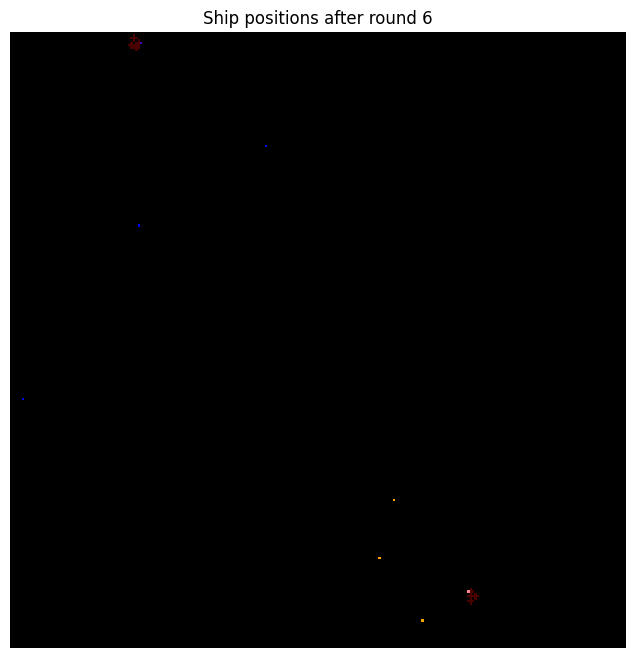


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (190, 232) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (192, 232) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (188, 232) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (190, 230) targeting Ship ID 14 (B medium)

---- Player B's Defense ----
Ship ID 10 (B large) moved from (159, 194) to (163, 194)
Ship ID 10 (B large) moved to (163, 194) as far as possible.
Ship ID 11 (B large) moved from (153, 218) to (154, 221)
Ship ID 11 (B large) moved to (154, 221) as far as possible.
Ship ID 14 (B medium) moved from (190, 232) to (193, 232)
Ship ID 14 (B medium) moved to (193, 232) as far as possible.
Ship ID 9 (B large) moved from (171, 244) to (171, 240)
Ship ID 9 (B large) moved to (171, 24

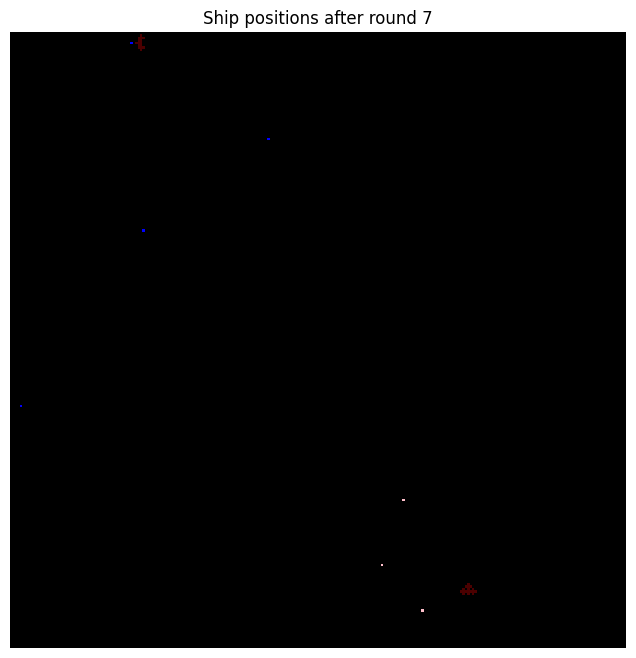


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (161, 193) targeting Ship ID 10 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (165, 193) targeting Ship ID 10 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (163, 192) targeting Ship ID 10 (B large)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (162, 195) targeting Ship ID 10 (B large)

---- Player B's Defense ----
Ship ID 10 (B large) moved from (163, 194) to (160, 195)
Ship ID 10 (B large) moved to (160, 195) as far as possible.
Ship ID 11 (B large) moved from (154, 221) to (156, 219)
Ship ID 11 (B large) moved to (156, 219) as far as possible.
Ship ID 9 (B large) moved from (171, 240) to (171, 236)
Ship ID 9 (B large) moved to (171, 236) as far as possible.

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (161, 193), but hit nothing.
Ship

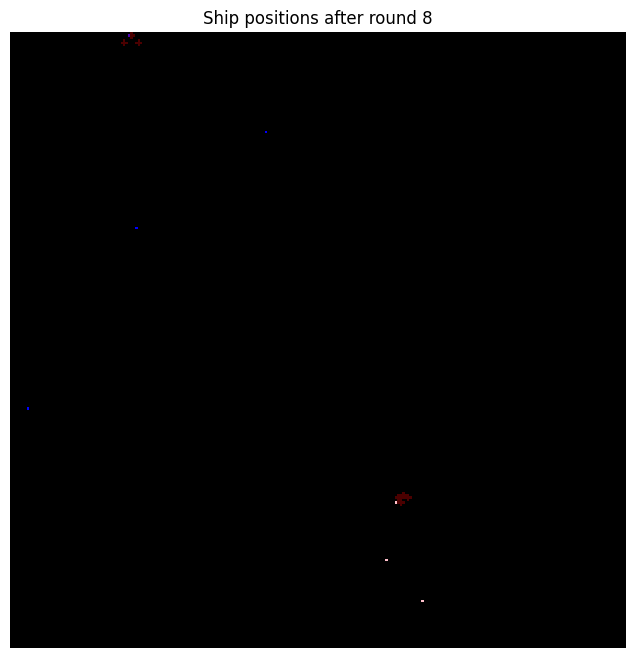


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 4 (A large) is preparing to use sonic missile to attack position (161, 196) targeting Ship ID 10 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (161, 193) targeting Ship ID 10 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (158, 194) targeting Ship ID 10 (B large)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (160, 198) targeting Ship ID 10 (B large)

---- Player B's Defense ----
Ship ID 10 (B large) moved from (160, 195) to (163, 194)
Ship ID 10 (B large) moved to (163, 194) as far as possible.
Ship ID 11 (B large) moved from (156, 219) to (156, 215)
Ship ID 11 (B large) moved to (156, 215) as far as possible.
Ship ID 9 (B large) moved from (171, 236) to (170, 233)
Ship ID 9 (B large) moved to (170, 233) as far as possible.

---- Resolving Player A's Attacks ----
Ship ID 4 attacked position (161, 196), but hit nothing.
Ship

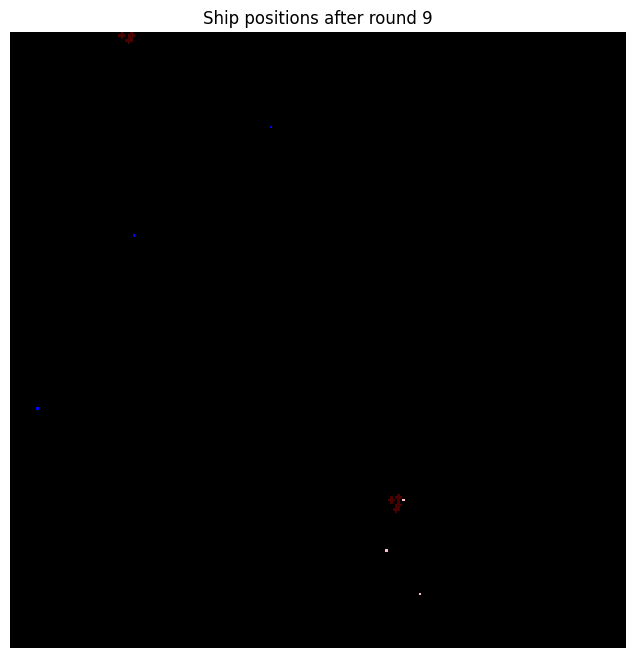


===== Round 10 begins =====

---- Player A's Attack ----

---- Player B's Defense ----
Ship ID 10 (B large) moved from (163, 194) to (160, 193)
Ship ID 10 (B large) moved to (160, 193) as far as possible.
Ship ID 11 (B large) moved from (156, 215) to (153, 214)
Ship ID 11 (B large) moved to (153, 214) as far as possible.
Ship ID 9 (B large) moved from (170, 233) to (169, 236)
Ship ID 9 (B large) moved to (169, 236) as far as possible.

---- Resolving Player A's Attacks ----

---- Player B's Attack ----

---- Player A's Defense ----
Ship ID 3 (A large) moved from (108, 39) to (105, 38)
Ship ID 3 (A large) moved to (105, 38) as far as possible.
Ship ID 1 (A large) moved from (51, 84) to (54, 85)
Ship ID 1 (A large) moved to (54, 85) as far as possible.
Ship ID 2 (A large) moved from (11, 156) to (15, 156)
Ship ID 2 (A large) moved to (15, 156) as far as possible.

---- Resolving Player B's Attacks ----


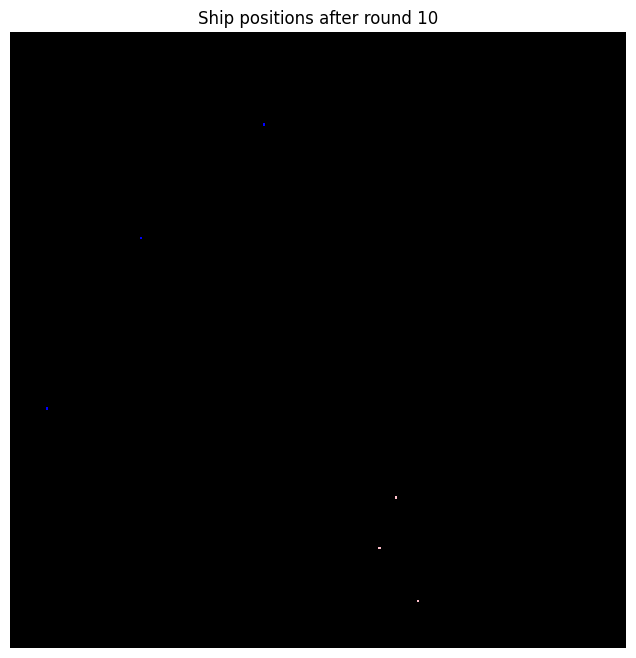

Game over!
Player A remaining ships: 3
Player B remaining ships: 3


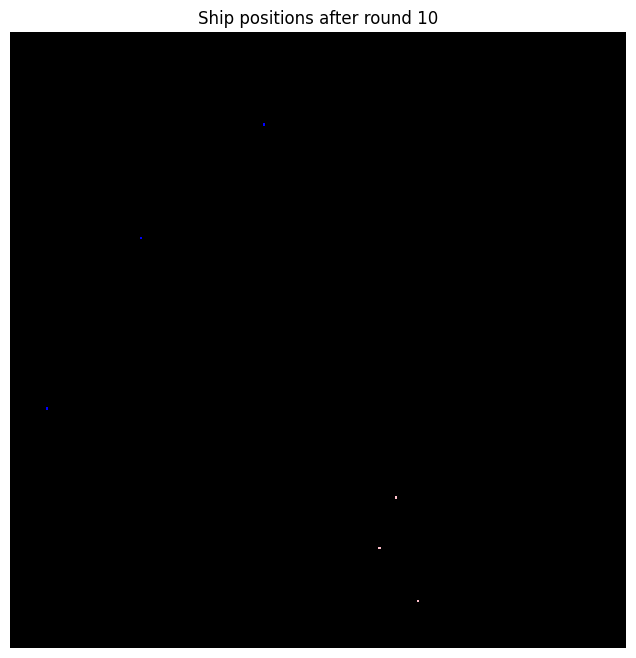


### Aggregated Results After 1000 Simulations ###
Total remaining ships of Player A: 3919
Total remaining ships of Player B: 3093
Average remaining ships of Player A per simulation: 3.92
Average remaining ships of Player B per simulation: 3.09


In [ ]:
# Attack phase function with greedy focused fire strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    # Sort defenders by priority: small > medium > large
    priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_defenders_sorted = sorted(alive_defenders, key=lambda x: priority_order[x.ship_type])

    # Sort attackers by priority: small > medium > large
    attackers_priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_attackers_sorted = sorted(alive_attackers, key=lambda x: attackers_priority_order[x.ship_type])

    attacks = []  # Store attack information

    # Keep track of which attackers have already attacked this turn
    attackers_available = alive_attackers_sorted.copy()

    for target_ship in alive_defenders_sorted:
        if not attackers_available:
            break  # No more attackers available

        # Calculate target's reachable positions (current and next turn)
        target_reachable_positions = get_reachable_positions(target_ship, game_map)

        # Define positions that need to be covered
        positions_to_cover = set(target_reachable_positions)

        while positions_to_cover and attackers_available:
            best_attacker = None
            best_weapon = None
            best_attack_position = None
            best_coverage = 0

            # Iterate through available attackers to find the best attack
            for attacker in attackers_available:
                available_weapons = attacker.available_weapons()
                if not available_weapons:
                    continue  # This attacker has no available weapons

                # Prioritize hypersonic over sonic for larger coverage
                if 'hypersonic' in available_weapons:
                    weapon_type = 'hypersonic'
                else:
                    weapon_type = 'sonic'

                weapon = Weapon(weapon_type)

                # Iterate through target's reachable positions to find attack positions
                for pos in positions_to_cover:
                    x, y = pos
                    # Potential attack position is the position itself
                    # Alternatively, attacker can attack surrounding positions to cover multiple targets
                    # Here, we choose to attack positions that can cover multiple target positions

                    # Calculate all possible attack positions that can cover this target position
                    for dx, dy in weapon.attack_pattern:
                        attack_x = x + dx
                        attack_y = y + dy
                        if game_map.is_within_bounds(attack_x, attack_y):
                            covered = set()
                            for ddx, ddy in weapon.attack_pattern:
                                covered_pos = (attack_x + ddx, attack_y + ddy)
                                if covered_pos in positions_to_cover and game_map.is_within_bounds(*covered_pos):
                                    covered.add(covered_pos)
                            coverage = len(covered)
                            if coverage > best_coverage:
                                best_coverage = coverage
                                best_attacker = attacker
                                best_weapon = weapon
                                best_attack_position = (attack_x, attack_y)

            if best_attacker and best_weapon and best_attack_position:
                # Assign the attack
                attacks.append({
                    'attacker_ship': best_attacker,
                    'weapon': best_weapon,
                    'attack_position': best_attack_position
                })

                if verbose:
                    print(f"Ship ID {best_attacker.ship_id} ({best_attacker.owner} {best_attacker.ship_type}) is preparing to use {best_weapon.weapon_type} missile to attack position {best_attack_position} targeting Ship ID {target_ship.ship_id} ({target_ship.owner} {target_ship.ship_type})")

                # Remove the covered positions
                for dx, dy in best_weapon.attack_pattern:
                    pos = (best_attack_position[0] + dx, best_attack_position[1] + dy)
                    if pos in positions_to_cover:
                        positions_to_cover.remove(pos)

                # Remove the attacker from available attackers
                attackers_available.remove(best_attacker)
            else:
                # No suitable attacker found to cover remaining positions
                break

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship to maximize distance from enemy ships
        move_ship_as_far_as_possible(ship, game_map, verbose=verbose)

# New function: Move ship as far as possible
def move_ship_as_far_as_possible(ship, game_map, verbose=False):
    # Current position
    current_x, current_y = ship.position

    # Generate all possible (dx, dy) with |dx| + |dy| = move_range
    possible_moves = []
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) == ship.move_range:
                possible_moves.append((dx, dy))

    # Shuffle the possible moves to ensure randomness
    random.shuffle(possible_moves)

    for move in possible_moves:
        new_x = current_x + move[0]
        new_y = current_y + move[1]

        if not game_map.is_within_bounds(new_x, new_y):
            continue  # Out of bounds
        if game_map.grid[new_y][new_x] is not None:
            continue  # Position occupied

        # Attempt to move
        moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
        if moved:
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) moved to ({new_x}, {new_y}) as far as possible.")
            return  # Move successful

    # If no move was possible, stay in place
    if verbose:
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) could not move and stays at ({current_x}, {current_y}).")

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        if verbose:
            print(f"Game over!")
            print(f"Player A remaining ships: {ships_A_remaining}")
            print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(1000)


### **遠離友軍船**


### Simulation 1 ###
Placed Ship ID 1 (A large) at position (6, 87)
Placed Ship ID 2 (A large) at position (66, 63)
Placed Ship ID 3 (A large) at position (43, 223)
Placed Ship ID 4 (A large) at position (75, 100)
Placed Ship ID 5 (A medium) at position (36, 228)
Placed Ship ID 6 (A medium) at position (74, 214)
Placed Ship ID 7 (A small) at position (1, 198)
Placed Ship ID 8 (A small) at position (39, 162)
Placed Ship ID 9 (B large) at position (159, 10)
Placed Ship ID 10 (B large) at position (194, 252)
Placed Ship ID 11 (B large) at position (200, 19)
Placed Ship ID 12 (B medium) at position (195, 144)
Placed Ship ID 13 (B medium) at position (247, 193)
Placed Ship ID 14 (B medium) at position (217, 100)
Placed Ship ID 15 (B small) at position (226, 168)
Placed Ship ID 16 (B small) at position (244, 249)
Placed Ship ID 17 (B small) at position (180, 128)

===== Round 1 begins =====

---- Player A's Attack ----
Ship ID 8 (A small) is preparing to use hypersonic missile to attack pos

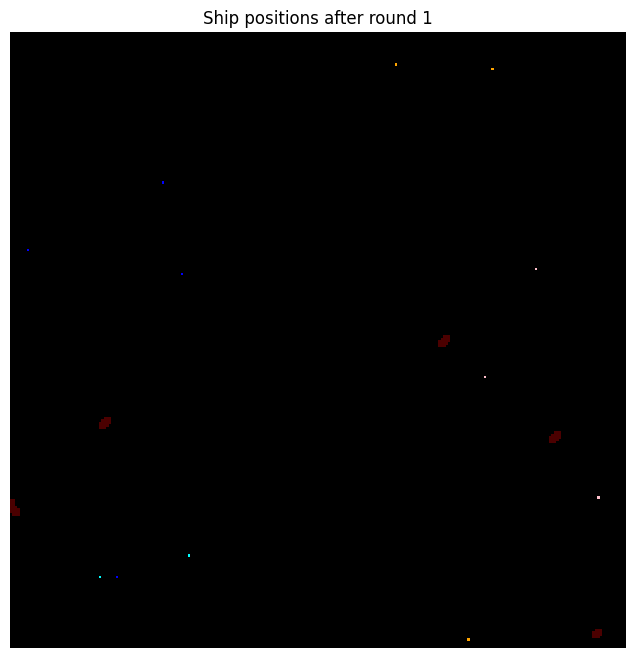


===== Round 2 begins =====

---- Player A's Attack ----
Ship ID 6 (A medium) is preparing to use hypersonic missile to attack position (218, 97) targeting Ship ID 14 (B medium)
Ship ID 5 (A medium) is preparing to use hypersonic missile to attack position (218, 100) targeting Ship ID 14 (B medium)
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (220, 98) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (215, 98) targeting Ship ID 14 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (217, 94) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (196, 143) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (160, 13) to (158, 11)
Ship ID 9 (B large) moved to (158, 11) as far as possible.
Ship ID 11 (B large) moved from (200, 15) to (203, 14)
Ship ID 11 (B large) 

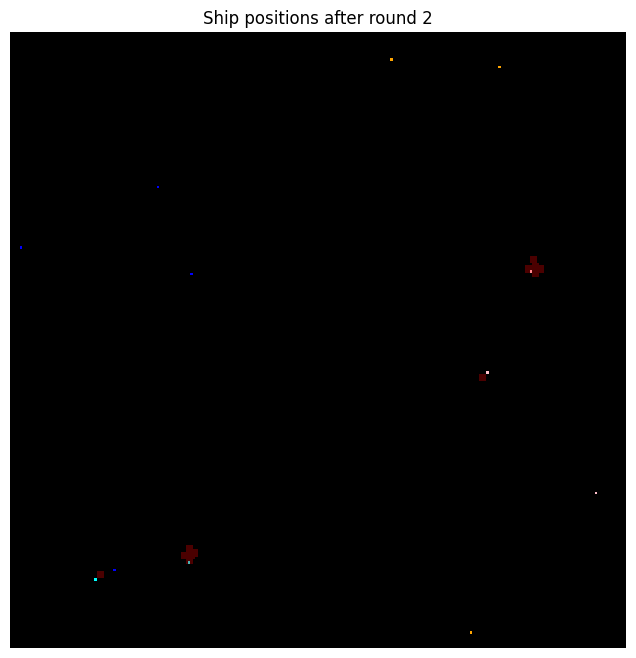


===== Round 3 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (216, 98) targeting Ship ID 14 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (216, 101) targeting Ship ID 14 (B medium)
Ship ID 6 (A medium) is preparing to use sonic missile to attack position (218, 99) targeting Ship ID 14 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (214, 99) targeting Ship ID 14 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (215, 95) targeting Ship ID 14 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (197, 141) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 9 (B large) moved from (158, 11) to (156, 13)
Ship ID 9 (B large) moved to (156, 13) as far as possible.
Ship ID 11 (B large) moved from (203, 14) to (203, 10)
Ship ID 11 (B large) moved to (

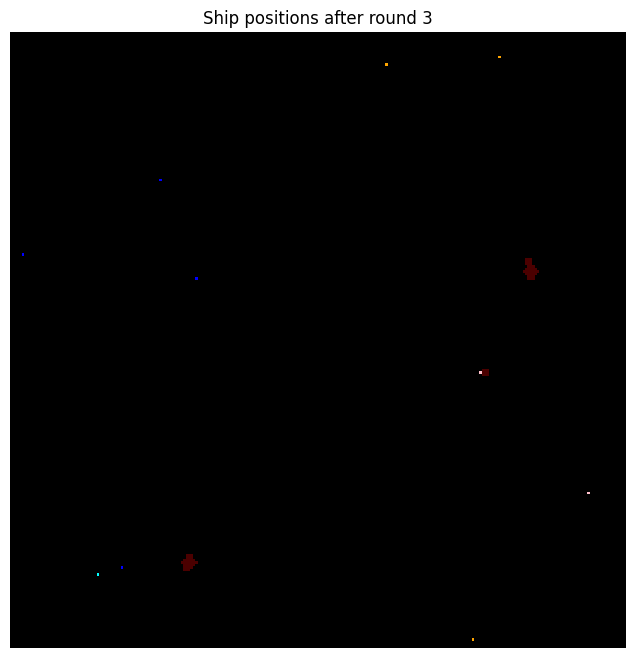


===== Round 4 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use hypersonic missile to attack position (194, 141) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use hypersonic missile to attack position (197, 141) targeting Ship ID 12 (B medium)
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (195, 139) targeting Ship ID 12 (B medium)
Ship ID 4 (A large) is preparing to use hypersonic missile to attack position (195, 143) targeting Ship ID 12 (B medium)
Ship ID 3 (A large) is preparing to use hypersonic missile to attack position (191, 140) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (203, 10) to (201, 8)
Ship ID 11 (B large) moved to (201, 8) as far as possible.
Ship ID 9 (B large) moved from (156, 13) to (159, 14)
Ship ID 9 (B large) moved to (159, 14) as far as possible.
Ship ID 12 (B medium) moved from (195, 141) to (192, 141)
Ship ID 12 (B medium) moved 

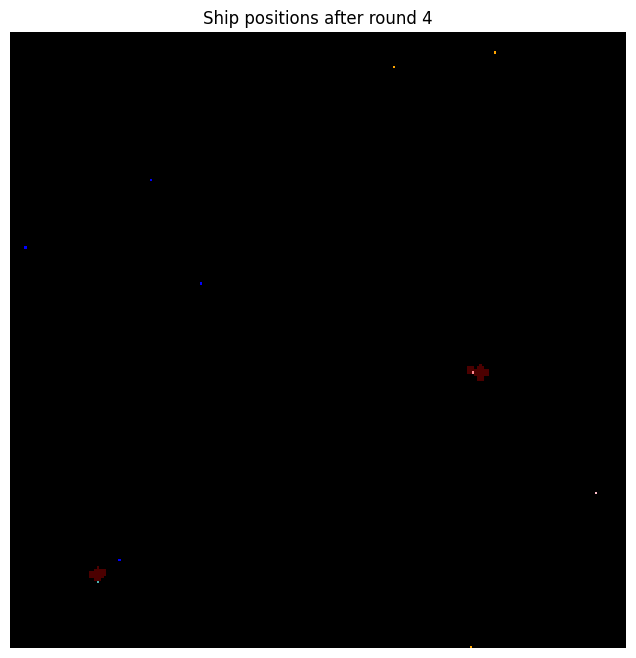


===== Round 5 begins =====

---- Player A's Attack ----
Ship ID 5 (A medium) is preparing to use sonic missile to attack position (192, 139) targeting Ship ID 12 (B medium)
Ship ID 2 (A large) is preparing to use sonic missile to attack position (191, 141) targeting Ship ID 12 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (194, 141) targeting Ship ID 12 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (192, 143) targeting Ship ID 12 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (190, 141) targeting Ship ID 12 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (201, 8) to (205, 8)
Ship ID 11 (B large) moved to (205, 8) as far as possible.
Ship ID 9 (B large) moved from (159, 14) to (162, 15)
Ship ID 9 (B large) moved to (162, 15) as far as possible.
Ship ID 12 (B medium) moved from (192, 141) to (194, 140)
Ship ID 12 (B medium) moved to (194, 140) as far 

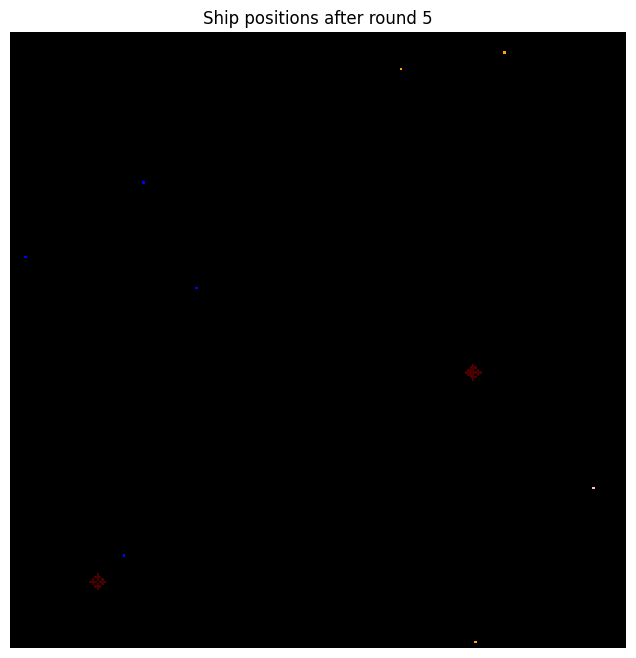


===== Round 6 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (242, 187) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (241, 189) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (243, 190) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (240, 189) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (205, 8) to (205, 12)
Ship ID 11 (B large) moved to (205, 12) as far as possible.
Ship ID 9 (B large) moved from (162, 15) to (160, 13)
Ship ID 9 (B large) moved to (160, 13) as far as possible.
Ship ID 13 (B medium) moved from (242, 189) to (241, 187)
Ship ID 13 (B medium) moved to (241, 187) as far as possible.
Ship ID 10 (B large) moved from (193, 253) to (189, 253)
Ship ID 10 (B large) moved to (189, 253) as f

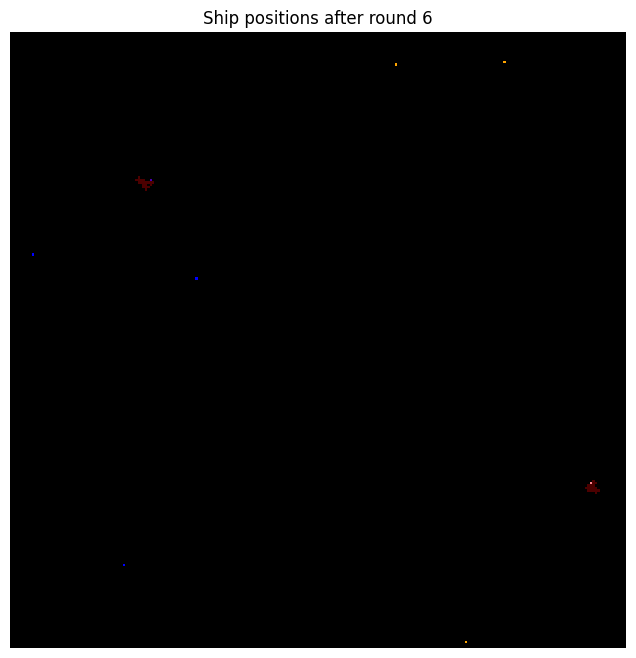


===== Round 7 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (241, 185) targeting Ship ID 13 (B medium)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (239, 187) targeting Ship ID 13 (B medium)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (241, 189) targeting Ship ID 13 (B medium)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (242, 187) targeting Ship ID 13 (B medium)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (205, 12) to (205, 8)
Ship ID 11 (B large) moved to (205, 8) as far as possible.
Ship ID 9 (B large) moved from (160, 13) to (159, 10)
Ship ID 9 (B large) moved to (159, 10) as far as possible.
Ship ID 13 (B medium) moved from (241, 187) to (240, 189)
Ship ID 13 (B medium) moved to (240, 189) as far as possible.
Ship ID 10 (B large) moved from (189, 253) to (191, 251)
Ship ID 10 (B large) moved to (191, 251) as fa

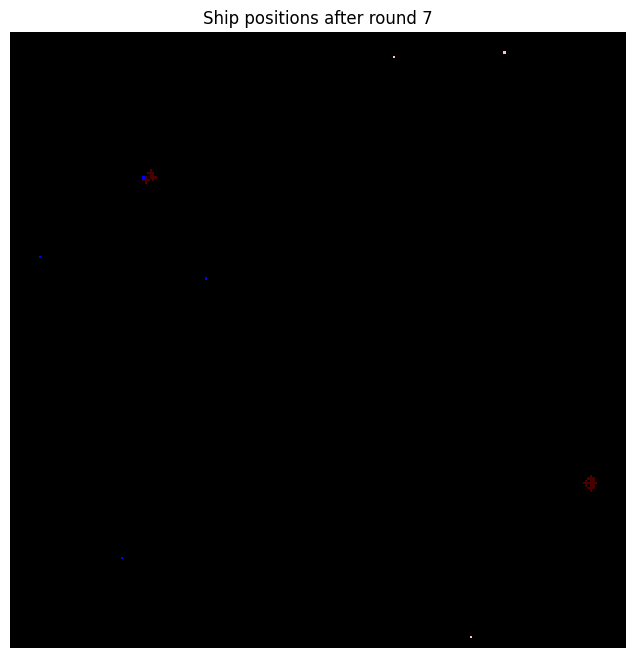


===== Round 8 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (207, 7) targeting Ship ID 11 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (205, 5) targeting Ship ID 11 (B large)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (204, 8) targeting Ship ID 11 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (205, 10) targeting Ship ID 11 (B large)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (205, 8) to (201, 8)
Ship ID 11 (B large) moved to (201, 8) as far as possible.
Ship ID 9 (B large) moved from (159, 10) to (156, 11)
Ship ID 9 (B large) moved to (156, 11) as far as possible.
Ship ID 10 (B large) moved from (191, 251) to (193, 253)
Ship ID 10 (B large) moved to (193, 253) as far as possible.

---- Resolving Player A's Attacks ----
Ship ID 2 attacked position (207, 7), but hit nothing.
Ship ID 2 remaining so

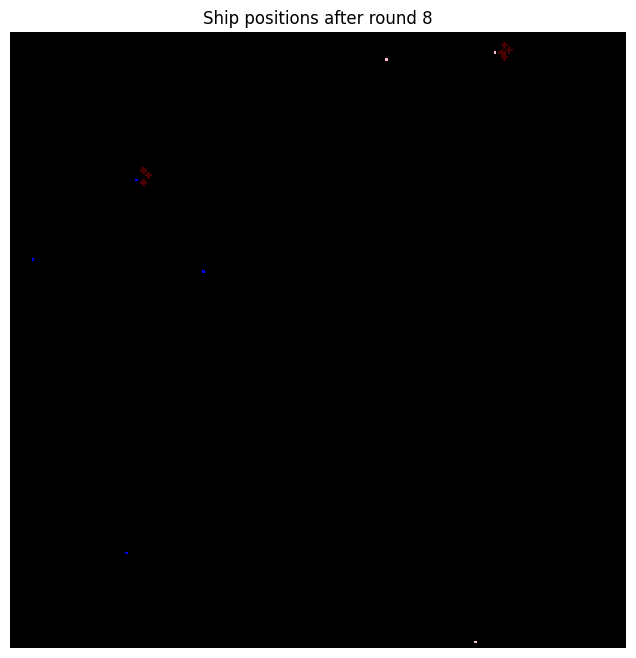


===== Round 9 begins =====

---- Player A's Attack ----
Ship ID 2 (A large) is preparing to use sonic missile to attack position (199, 7) targeting Ship ID 11 (B large)
Ship ID 1 (A large) is preparing to use sonic missile to attack position (200, 10) targeting Ship ID 11 (B large)
Ship ID 4 (A large) is preparing to use sonic missile to attack position (204, 8) targeting Ship ID 11 (B large)
Ship ID 3 (A large) is preparing to use sonic missile to attack position (201, 5) targeting Ship ID 11 (B large)

---- Player B's Defense ----
Ship ID 11 (B large) moved from (201, 8) to (201, 4)
Ship ID 11 (B large) moved to (201, 4) as far as possible.
Ship ID 9 (B large) moved from (156, 11) to (157, 8)
Ship ID 9 (B large) moved to (157, 8) as far as possible.
Ship ID 10 (B large) moved from (193, 253) to (197, 253)
Ship ID 10 (B large) moved to (197, 253) as far as possible.

---- Resolving Player A's Attacks ----
Ship ID 2 attacked position (199, 7), but hit nothing.
Ship ID 2 remaining soni

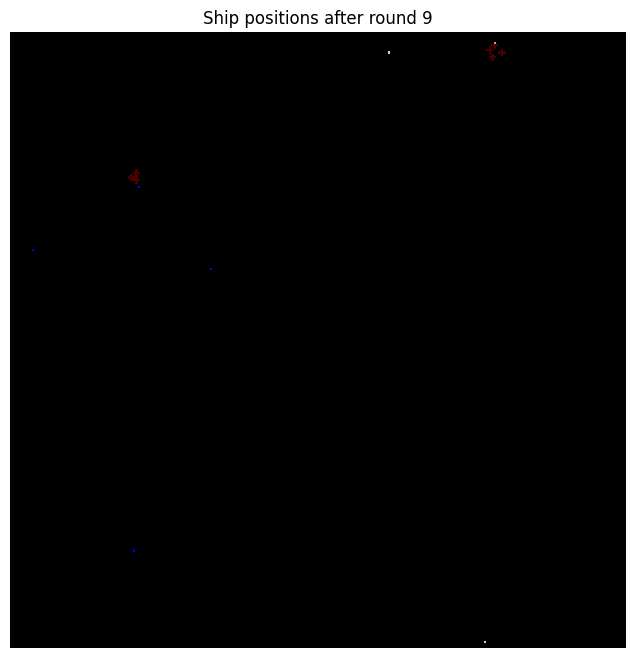


===== Round 10 begins =====

---- Player A's Attack ----

---- Player B's Defense ----
Ship ID 11 (B large) moved from (201, 4) to (204, 3)
Ship ID 11 (B large) moved to (204, 3) as far as possible.
Ship ID 9 (B large) moved from (157, 8) to (159, 6)
Ship ID 9 (B large) moved to (159, 6) as far as possible.
Ship ID 10 (B large) moved from (197, 253) to (193, 253)
Ship ID 10 (B large) moved to (193, 253) as far as possible.

---- Resolving Player A's Attacks ----

---- Player B's Attack ----

---- Player A's Defense ----
Ship ID 2 (A large) moved from (53, 64) to (50, 63)
Ship ID 2 (A large) moved to (50, 63) as far as possible.
Ship ID 1 (A large) moved from (9, 90) to (7, 88)
Ship ID 1 (A large) moved to (7, 88) as far as possible.
Ship ID 4 (A large) moved from (83, 98) to (86, 97)
Ship ID 4 (A large) moved to (86, 97) as far as possible.
Ship ID 3 (A large) moved from (51, 215) to (49, 217)
Ship ID 3 (A large) moved to (49, 217) as far as possible.

---- Resolving Player B's Attack

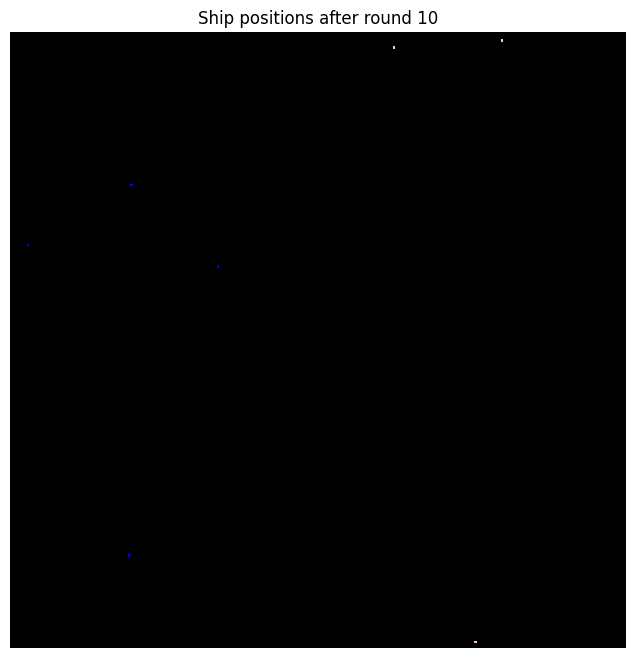

Game over!
Player A remaining ships: 4
Player B remaining ships: 3


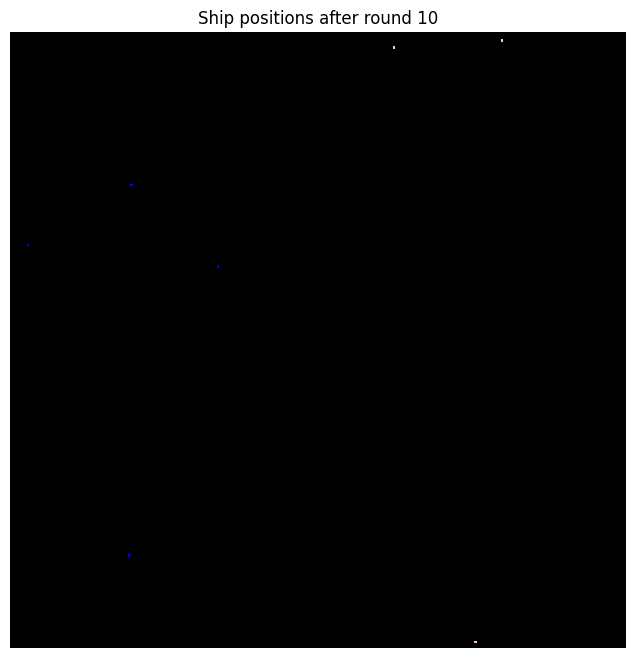


### Aggregated Results After 1000 Simulations ###
Total remaining ships of Player A: 3921
Total remaining ships of Player B: 3076
Average remaining ships of Player A per simulation: 3.92
Average remaining ships of Player B per simulation: 3.08


In [4]:
# Attack phase function with greedy focused fire strategy
def attack_phase(attacker_ships, defender_ships, game_map, verbose=False):
    # Filter out sunk ships
    alive_attackers = [ship for ship in attacker_ships if ship.alive]
    alive_defenders = [ship for ship in defender_ships if ship.alive]

    if not alive_attackers or not alive_defenders:
        return [], []  # No ships to attack or defend

    # Sort defenders by priority: small > medium > large
    priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_defenders_sorted = sorted(alive_defenders, key=lambda x: priority_order[x.ship_type])

    # Sort attackers by priority: small > medium > large
    attackers_priority_order = {'small': 1, 'medium': 2, 'large': 3}
    alive_attackers_sorted = sorted(alive_attackers, key=lambda x: attackers_priority_order[x.ship_type])

    attacks = []  # Store attack information

    # Keep track of which attackers have already attacked this turn
    attackers_available = alive_attackers_sorted.copy()

    for target_ship in alive_defenders_sorted:
        if not attackers_available:
            break  # No more attackers available

        # Calculate target's reachable positions (current and next turn)
        target_reachable_positions = get_reachable_positions(target_ship, game_map)

        # Define positions that need to be covered
        positions_to_cover = set(target_reachable_positions)

        while positions_to_cover and attackers_available:
            best_attacker = None
            best_weapon = None
            best_attack_position = None
            best_coverage = 0

            # Iterate through available attackers to find the best attack
            for attacker in attackers_available:
                available_weapons = attacker.available_weapons()
                if not available_weapons:
                    continue  # This attacker has no available weapons

                # Prioritize hypersonic over sonic for larger coverage
                if 'hypersonic' in available_weapons:
                    weapon_type = 'hypersonic'
                else:
                    weapon_type = 'sonic'

                weapon = Weapon(weapon_type)

                # Iterate through target's reachable positions to find attack positions
                for pos in positions_to_cover:
                    x, y = pos
                    # Potential attack position is the position itself
                    # Alternatively, attacker can attack surrounding positions to cover multiple targets
                    # Here, we choose to attack positions that can cover multiple target positions

                    # Calculate all possible attack positions that can cover this target position
                    for dx, dy in weapon.attack_pattern:
                        attack_x = x + dx
                        attack_y = y + dy
                        if game_map.is_within_bounds(attack_x, attack_y):
                            covered = set()
                            for ddx, ddy in weapon.attack_pattern:
                                covered_pos = (attack_x + ddx, attack_y + ddy)
                                if covered_pos in positions_to_cover and game_map.is_within_bounds(*covered_pos):
                                    covered.add(covered_pos)
                            coverage = len(covered)
                            if coverage > best_coverage:
                                best_coverage = coverage
                                best_attacker = attacker
                                best_weapon = weapon
                                best_attack_position = (attack_x, attack_y)

            if best_attacker and best_weapon and best_attack_position:
                # Assign the attack
                attacks.append({
                    'attacker_ship': best_attacker,
                    'weapon': best_weapon,
                    'attack_position': best_attack_position
                })

                if verbose:
                    print(f"Ship ID {best_attacker.ship_id} ({best_attacker.owner} {best_attacker.ship_type}) is preparing to use {best_weapon.weapon_type} missile to attack position {best_attack_position} targeting Ship ID {target_ship.ship_id} ({target_ship.owner} {target_ship.ship_type})")

                # Remove the covered positions
                for dx, dy in best_weapon.attack_pattern:
                    pos = (best_attack_position[0] + dx, best_attack_position[1] + dy)
                    if pos in positions_to_cover:
                        positions_to_cover.remove(pos)

                # Remove the attacker from available attackers
                attackers_available.remove(best_attacker)
            else:
                # No suitable attacker found to cover remaining positions
                break

    return attacks, alive_defenders

# Defense phase function
def defense_phase(defender_ships, game_map, verbose=False):
    alive_defenders = [ship for ship in defender_ships if ship.alive]
    if not alive_defenders:
        if verbose:
            print("No ships available to defend.")
        return  # No ships to defend

    for ship in alive_defenders:
        # Move ship as far as possible while avoiding too close to friendly ships
        move_ship_as_far_as_possible(ship, game_map, verbose=verbose)

# New function: Move ship as far as possible while avoiding close proximity to friendly ships
def move_ship_as_far_as_possible(ship, game_map, verbose=False):
    # Current position
    current_x, current_y = ship.position

    # Generate all possible (dx, dy) with |dx| + |dy| = move_range
    possible_moves = []
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) == ship.move_range:
                possible_moves.append((dx, dy))

    # Shuffle the possible moves to ensure randomness
    random.shuffle(possible_moves)

    for move in possible_moves:
        new_x = current_x + move[0]
        new_y = current_y + move[1]

        if not game_map.is_within_bounds(new_x, new_y):
            continue  # Out of bounds
        if game_map.grid[new_y][new_x] is not None:
            continue  # Position occupied

        # Check if the new position is too close to any other friendly ship
        if is_position_too_close(new_x, new_y, ship.owner, game_map):
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) cannot move to ({new_x}, {new_y}) - Too close to another friendly ship.")
            continue  # Skip this move

        # Attempt to move
        moved = game_map.move_ship(ship, (new_x, new_y), verbose=verbose)
        if moved:
            if verbose:
                print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) moved to ({new_x}, {new_y}) as far as possible.")
            return  # Move successful

    # If no move was possible, stay in place
    if verbose:
        print(f"Ship ID {ship.ship_id} ({ship.owner} {ship.ship_type}) could not move and stays at ({current_x}, {current_y}).")

# Utility function: Check if a position is too close to any friendly ship
def is_position_too_close(x, y, owner, game_map):
    # Define minimum required Manhattan distance
    MIN_MANDIST = 3

    # Iterate through all friendly ships
    friendly_ships = game_map.get_ships_by_owner(owner)
    for ship in friendly_ships:
        if ship.position == (x, y):
            continue  # Same ship
        distance = manhattan_distance((x, y), ship.position)
        if distance < MIN_MANDIST:
            return True  # Too close to another friendly ship
    return False  # Safe to move

# Utility function: Calculate Manhattan distance
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

# Resolve attacks function
def resolve_attacks(attacks, game_map, verbose=False):
    weapon_areas = []  # For visualization
    for attack in attacks:
        attacker_ship = attack['attacker_ship']
        weapon = attack['weapon']
        attack_position = attack['attack_position']
        affected_positions = perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=verbose)
        weapon_areas.extend(affected_positions)
    return weapon_areas

# Perform attack function
def perform_attack(attacker_ship, weapon, attack_position, game_map, verbose=False):
    attack_positions = []
    tx, ty = attack_position
    for dx, dy in weapon.attack_pattern:
        x, y = tx + dx, ty + dy
        if game_map.is_within_bounds(x, y):
            attack_positions.append((x, y))
    # Mark whether any ship was hit
    hit = False
    # Check if any ships (regardless of ownership) are at the attack positions
    for x, y in attack_positions:
        target = game_map.grid[y][x]
        if target and target.alive:
            # Hit, cause 1 damage
            target.take_damage(1)
            hit = True
            relation = 'enemy' if target.owner != attacker_ship.owner else 'friendly'
            if verbose:
                print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, hit {relation} ship ID {target.ship_id} ({target.owner} {target.ship_type})!")
                print(f"Target ship ID {target.ship_id} remaining HP: {target.hit_points_remaining}")
            if target.is_sunk():
                game_map.remove_ship(target, verbose=verbose)
                if verbose:
                    print(f"Target ship ID {target.ship_id} has been destroyed!")
    if not hit and verbose:
        print(f"Ship ID {attacker_ship.ship_id} attacked position {attack_position}, but hit nothing.")
    # Reduce weapon count
    if weapon.weapon_type == 'sonic':
        attacker_ship.sonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining sonic missiles: {attacker_ship.sonic_missiles}")
    elif weapon.weapon_type == 'hypersonic':
        attacker_ship.hypersonic_missiles -= 1
        if verbose:
            print(f"Ship ID {attacker_ship.ship_id} remaining hypersonic missiles: {attacker_ship.hypersonic_missiles}")
    return attack_positions  # Return positions affected by the attack

# Get reachable positions function
def get_reachable_positions(ship, game_map):
    reachable_positions = set()
    x, y = ship.position
    for dx in range(-ship.move_range, ship.move_range + 1):
        for dy in range(-ship.move_range, ship.move_range + 1):
            if abs(dx) + abs(dy) > ship.move_range:
                continue  # Exceeds move range
            new_x = x + dx
            new_y = y + dy
            if game_map.is_within_bounds(new_x, new_y):
                reachable_positions.add((new_x, new_y))
    return reachable_positions

# Visualize game function with weapon coverage
def visualize_game(game_map, round_number, weapon_areas=None):
    data = np.zeros((game_map.size, game_map.size))
    for ship in game_map.get_all_ships():
        x, y = ship.position
        if ship.owner == 'A':
            if ship.ship_type == 'large':
                data[y][x] = 1  # Different values represent different ships
            elif ship.ship_type == 'medium':
                data[y][x] = 2
            elif ship.ship_type == 'small':
                data[y][x] = 3
        elif ship.owner == 'B':
            if ship.ship_type == 'large':
                data[y][x] = 4
            elif ship.ship_type == 'medium':
                data[y][x] = 5
            elif ship.ship_type == 'small':
                data[y][x] = 6

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the ship positions
    cmap = ListedColormap(['black', 'blue', 'cyan', 'lightblue', 'red', 'orange', 'pink'])
    ax.imshow(data, cmap=cmap, interpolation='none')

    # Overlay weapon coverage areas
    if weapon_areas:
        weapon_layer = np.zeros((game_map.size, game_map.size))
        for x, y in weapon_areas:
            weapon_layer[y][x] = 1  # Mark the weapon coverage area
        # Use a translucent red overlay for weapon areas
        ax.imshow(weapon_layer, cmap=ListedColormap(['none', 'red']), alpha=0.3, interpolation='none')

    ax.set_title(f"Ship positions after round {round_number}")
    ax.axis('off')
    plt.show()

# Main game function for a single simulation
def run_single_game(verbose=False, visualize=False):
    game_map, ships = initialize_game(verbose=verbose)
    total_rounds = 10
    for round_number in range(1, total_rounds + 1):
        if verbose:
            print(f"\n===== Round {round_number} begins =====\n")

        # Player A attacks, Player B defends
        if verbose:
            print("---- Player A's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('A')
        defender_ships = game_map.get_ships_by_owner('B')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player B's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player A's Attacks ----")
        weapon_areas_A = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player B has any ships left
        defender_ships = game_map.get_ships_by_owner('B')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player B's ships have been destroyed. Player A wins!")
                visualize_game(game_map, round_number, weapon_areas_A)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Player B attacks, Player A defends
        if verbose:
            print("\n---- Player B's Attack ----")
        attacker_ships = game_map.get_ships_by_owner('B')
        defender_ships = game_map.get_ships_by_owner('A')
        attacks, defender_ships = attack_phase(attacker_ships, defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Player A's Defense ----")
        defense_phase(defender_ships, game_map, verbose=verbose)
        if verbose:
            print("\n---- Resolving Player B's Attacks ----")
        weapon_areas_B = resolve_attacks(attacks, game_map, verbose=verbose)

        # Check if Player A has any ships left
        defender_ships = game_map.get_ships_by_owner('A')
        if not any(ship.alive for ship in defender_ships):
            if verbose:
                print("All Player A's ships have been destroyed. Player B wins!")
                visualize_game(game_map, round_number, weapon_areas_B)
            return len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive]), len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])

        # Visualize current state with weapon coverage areas
        if visualize:
            # Combine weapon areas from both players
            combined_weapon_areas = weapon_areas_A + weapon_areas_B
            visualize_game(game_map, round_number, combined_weapon_areas)

    else:
        # Game ended without a winner; count remaining ships
        ships_A_remaining = len([ship for ship in game_map.get_ships_by_owner('A') if ship.alive])
        ships_B_remaining = len([ship for ship in game_map.get_ships_by_owner('B') if ship.alive])
        if verbose:
            print(f"Game over!")
            print(f"Player A remaining ships: {ships_A_remaining}")
            print(f"Player B remaining ships: {ships_B_remaining}")
        if visualize:
            visualize_game(game_map, round_number)
        return ships_A_remaining, ships_B_remaining

# Main function to run multiple simulations
def run_multiple_simulations(num_simulations=100):
    total_remaining_A = 0
    total_remaining_B = 0

    for simulation in range(1, num_simulations + 1):
        if simulation == 1:
            # First simulation: verbose output and visualization
            print(f"\n### Simulation {simulation} ###")
            remaining_A, remaining_B = run_single_game(verbose=True, visualize=True)
        else:
            # Subsequent simulations: no output or visualization
            remaining_A, remaining_B = run_single_game(verbose=False, visualize=False)

        total_remaining_A += remaining_A
        total_remaining_B += remaining_B

    # After all simulations, print the aggregated results
    print(f"\n### Aggregated Results After {num_simulations} Simulations ###")
    print(f"Total remaining ships of Player A: {total_remaining_A}")
    print(f"Total remaining ships of Player B: {total_remaining_B}")

    # Calculate average remaining ships per simulation
    average_A = total_remaining_A / num_simulations
    average_B = total_remaining_B / num_simulations
    print(f"Average remaining ships of Player A per simulation: {average_A:.2f}")
    print(f"Average remaining ships of Player B per simulation: {average_B:.2f}")

# Run the multiple simulations
if __name__ == "__main__":
    run_multiple_simulations(1000)
